## **Problem Statement & Motivations**
Airbnb, a leading lodging platform with millions of unique listings worldwide, captures our interest as Boston University students, particularly for its Boston area listings. Our project aims to tackle challenges of deciphering the factors that contribute to a listing's success and understanding the natural grouping using unsupervised machine learning. By analyzing the extensive and diverse dataset, we seek to uncover patterns and trends that can inform better decision-making for hosts and improve the overall experience for customers.

##**Dataset**
Dataset Source: http://insideairbnb.com/get-the-data/
We will be using “Listings” and “Reviews” tables from the Boston data section on the website, providing a thorough overview of Boston's Airbnb listings. It includes information on accommodation types, prices, descriptions, and reviews in addition to geographic data.

## **Load and peek at the data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
#df_listings = pd.read_csv('/content/drive/MyDrive/DataSet/listings.csv')
#df_reviews = pd.read_csv('/content/drive/MyDrive/DataSet/reviews.csv')

df_listings = pd.read_csv('/content/listings.csv')
df_reviews = pd.read_csv('/content/reviews.csv')
# df_listings = pd.read_csv('/content/drive/MyDrive/listings.csv')
# df_reviews = pd.read_csv('/content/drive/MyDrive/reviews.csv')

for data in [df_listings,df_reviews]:
    display(data)
    print(data.shape)

id                                       listing_url  \
0                    3781                 https://www.airbnb.com/rooms/3781   
1                    5506                 https://www.airbnb.com/rooms/5506   
2                    6695                 https://www.airbnb.com/rooms/6695   
3                    8789                 https://www.airbnb.com/rooms/8789   
4                   10813                https://www.airbnb.com/rooms/10813   
...                   ...                                               ...   
4199  1046563598019556549  https://www.airbnb.com/rooms/1046563598019556549   
4200  1046568292864752336  https://www.airbnb.com/rooms/1046568292864752336   
4201  1047166785349446101  https://www.airbnb.com/rooms/1047166785349446101   
4202  1047226383263246733  https://www.airbnb.com/rooms/1047226383263246733   
4203  1048051750111422883  https://www.airbnb.com/rooms/1048051750111422883   

           scrape_id last_scraped       source  \
0     20231218233145   2023-12-19  city scrape   
1     20231218233145   2023-12-19  city scrape   
2     20231218233145   2023-12-19  city scrape   
3     20231218233145   2023-12-19  city scrape   
4     20231218233145   2023-12-19  city scrape   
...              ...          ...          ...   
4199  20231218233145   2023-12-19  city scrape   
4200  20231218233145   2023-12-19  city scrape   
4201  20231218233145   2023-12-19  city scrape   
4202  20231218233145   2023-12-19  city scrape   
4203  20231218233145   2023-12-19  city scrape   

                                                   name  description  \
0     Rental unit in Boston · ★4.96 · 1 bedroom · 1 ...          NaN   
1     Guest suite in Boston · ★4.79 · 1 bedroom · 1 ...          NaN   
2     Condo in Boston · ★4.81 · Studio · 2 beds · 1 ...          NaN   
3     Rental unit in Boston · ★4.67 · 1 bedroom · 1 ...          NaN   
4     Rental unit in Boston · ★5.0 · Studio · 1 bed ...          NaN   
...                                                 ...          ...   
4199  Rental unit in Boston · ★New · 2 bedrooms · 3 ...          NaN   
4200  Rental unit in Boston · ★New · 1 bedroom · 3 b...          NaN   
4201  Rental unit in Boston · ★New · 1 bedroom · 2 b...          NaN   
4202  Rental unit in Boston · ★New · 2 bedrooms · 3 ...          NaN   
4203  Rental unit in Boston · ★New · 1 bedroom · 1 b...          NaN   

                                  neighborhood_overview  \
0     Mostly quiet ( no loud music, no crowed sidewa...   
1     Peaceful, Architecturally interesting, histori...   
2     Peaceful, Architecturally interesting, histori...   
3     Beacon Hill is a historic neighborhood filled ...   
4     Wander around this quintessential neighborhood...   
...                                                 ...   
4199                                                NaN   
4200                                                NaN   
4201  With its brownstones, Boston Marathon finish l...   
4202                                                NaN   
4203                                                NaN   

                                            picture_url    host_id  ...  \
0     https://a0.muscache.com/pictures/24670/b2de044...       4804  ...   
1     https://a0.muscache.com/pictures/miso/Hosting-...       8229  ...   
2     https://a0.muscache.com/pictures/38ac4797-e7a4...       8229  ...   
3     https://a0.muscache.com/pictures/miso/Hosting-...      26988  ...   
4     https://a0.muscache.com/pictures/20b5b9c9-e1f4...      38997  ...   
...                                                 ...        ...  ...   
4199  https://a0.muscache.com/pictures/prohost-api/H...  212359760  ...   
4200  https://a0.muscache.com/pictures/prohost-api/H...  212359760  ...   
4201  https://a0.muscache.com/pictures/miso/Hosting-...  233908696  ...   
4202  https://a0.muscache.com/pictures/prohost-api/H...  212359760  ...   
4203  https://a0.muscache.com/pictures/e53f88a5-f860...  108724738  ...   

(4204, 75)


listing_id                   id        date  reviewer_id  \
0                      3781             37776825  2015-07-10     36059247   
1                      3781             41842494  2015-08-09     10459388   
2                      3781             45282151  2015-09-01     12264652   
3                      3781             49022647  2015-09-30     41426327   
4                      3781             52503327  2015-10-30     15151513   
...                     ...                  ...         ...          ...   
182477  1039150219616773193  1045693858976693752  2023-12-13    381198215   
182478  1040527526059629043  1042105725677485453  2023-12-08      9723289   
182479  1040634799097914803  1047144075583848904  2023-12-15    494876133   
182480  1040634799097914803  1049339123694758332  2023-12-18     94199776   
182481  1046563598019556549  1047871350720023386  2023-12-16    336213171   

          reviewer_name                                           comments  
0                  Greg  The apartment was as advertised and Frank was ...  
1                   Tai  It was a pleasure to stay at Frank's place. Th...  
2                Damien  The apartment description is entirely faithful...  
3                  Mike  Thoroughly enjoyed my time at Frank's home. Ha...  
4                  Ivan  Great value for the money! This location has e...  
...                 ...                                                ...  
182477        Gabrielle  A wonderful location to walk around the North ...  
182478  David & Whitley                   Great deal and responsive hosts!  
182479         Dannieli  Our stay at Diego’s place was great!<br/>The a...  
182480            Maxim  Good place; solid bedrooms/bathrooms; nice to ...  
182481            Jason          Great host great home and amazing service  

[182482 rows x 6 columns]

(182482, 6)


In [5]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182482 entries, 0 to 182481
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     182482 non-null  int64 
 1   id             182482 non-null  int64 
 2   date           182482 non-null  object
 3   reviewer_id    182482 non-null  int64 
 4   reviewer_name  182481 non-null  object
 5   comments       182430 non-null  object
dtypes: int64(3), object(3)
memory usage: 8.4+ MB


In [6]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4204 entries, 0 to 4203
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4204 non-null   int64  
 1   listing_url                                   4204 non-null   object 
 2   scrape_id                                     4204 non-null   int64  
 3   last_scraped                                  4204 non-null   object 
 4   source                                        4204 non-null   object 
 5   name                                          4204 non-null   object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         2742 non-null   object 
 8   picture_url                                   4204 non-null   object 
 9   host_id                                       4204 non-null   i

## **Data Preprocessing**

### **Check Null value for review cvs**

In [7]:
df_reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     1
comments         52
dtype: int64

In the reviews dataset, which contains 182,482 data points, there are minimal instances of missing values—specifically, only 1 in "reviewer_name" and 52 in "comments." Given their negligible proportion, these records can be straightforwardly omitted from the analysis.

In [8]:
df_reviews.dropna(inplace = True)

In [9]:
df_reviews.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

### **Check Null value for listing cvs**

In [10]:
df_listings.describe(include='all')

id                        listing_url     scrape_id  \
count   4.204000e+03                               4204  4.204000e+03   
unique           NaN                               4204           NaN   
top              NaN  https://www.airbnb.com/rooms/3781           NaN   
freq             NaN                                  1           NaN   
mean    3.944249e+17                                NaN  2.023122e+13   
std     4.329857e+17                                NaN  0.000000e+00   
min     3.781000e+03                                NaN  2.023122e+13   
25%     2.921738e+07                                NaN  2.023122e+13   
50%     5.289384e+07                                NaN  2.023122e+13   
75%     8.389424e+17                                NaN  2.023122e+13   
max     1.048052e+18                                NaN  2.023122e+13   

       last_scraped       source  \
count          4204         4204   
unique            2            2   
top      2023-12-19  city scrape   
freq           4145         3588   
mean            NaN          NaN   
std             NaN          NaN   
min             NaN          NaN   
25%             NaN          NaN   
50%             NaN          NaN   
75%             NaN          NaN   
max             NaN          NaN   

                                                     name  description  \
count                                                4204          0.0   
unique                                               1942          NaN   
top     Rental unit in Boston · 1 bedroom · 1 bed · 1 ...          NaN   
freq                                                  311          NaN   
mean                                                  NaN          NaN   
std                                                   NaN          NaN   
min                                                   NaN          NaN   
25%                                                   NaN          NaN   
50%                                                   NaN          NaN   
75%                                                   NaN          NaN   
max                                                   NaN          NaN   

                                    neighborhood_overview  \
count                                                2742   
unique                                               1453   
top     This furnished apartment is situated in Back B...   
freq                                                   65   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                              picture_url       host_id  ...  \
count                                                4204  4.204000e+03  ...   
unique                                               4088           NaN  ...   
top     https://a0.muscache.com/pictures/miso/Hosting-...           NaN  ...   
freq                                                    6           NaN  ...   
mean                                                  NaN  1.614269e+08  ...   
std                                                   NaN  1.552065e+08  ...   
min                                                   NaN  4.804000e+03  ...   
25%                                                   NaN  2.234822e+07  ...   
50%                                                   NaN  1.074344e+08  ...   
75%                                                   NaN  2.758496e+08  ...   
max                                                   NaN  5.485732e+08  ...   

       review_scores_communication review_scores_location review_scores_value  \
count                  3089.000000          

In [11]:
missing_data = df_listings.isnull().sum()
missing_percentage = (missing_data / len(df_listings)) * 100

missing_df = pd.DataFrame({'missing_count': missing_data, 'missing_percentage': missing_percentage})
missing_df[missing_df['missing_count'] > 0].sort_values(by='missing_percentage', ascending=False)

missing_count  missing_percentage
description                            4204          100.000000
bathrooms                              4204          100.000000
calendar_updated                       4204          100.000000
bedrooms                               4204          100.000000
neighbourhood_group_cleansed           4204          100.000000
license                                1509           35.894386
neighborhood_overview                  1462           34.776403
neighbourhood                          1462           34.776403
host_about                             1247           29.662226
last_review                            1118           26.593720
first_review                           1118           26.593720
reviews_per_month                      1118           26.593720
review_scores_value                    1117           26.569933
review_scores_checkin                  1117           26.569933
review_scores_location                 1117           26.569933
review_scores_accuracy                 1116           26.546147
review_scores_rating                   1115           26.522360
review_scores_cleanliness              1115           26.522360
review_scores_communication            1115           26.522360
host_location                           862           20.504282
host_response_rate                      548           13.035205
host_response_time                      548           13.035205
host_acceptance_rate                    493           11.726927
price                                   350            8.325404
has_availability                        350            8.325404
host_neighbourhood                      123            2.925785
beds                                     54            1.284491
host_is_superhost                        36            0.856327
bathrooms_text                            1            0.023787

In [12]:
df_listings.drop(columns=['description', 'bathrooms', 'calendar_updated', 'bedrooms', 'neighbourhood_group_cleansed'], inplace=True)

In [13]:
df_listings.drop(df_listings.columns[df_listings.columns.str.contains("url")],axis=1,inplace=True)

In [14]:
df_listings.drop(columns=['calculated_host_listings_count_shared_rooms','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','host_location','amenities','host_name','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','host_listings_count','host_total_listings_count','number_of_reviews_ltm','number_of_reviews_l30d','last_scraped','source','availability_30','availability_60','availability_90','calendar_last_scraped'], inplace=True)

In [15]:
df_listings['bathrooms'] = df_listings['bathrooms_text'].str.extract(r'(\d+\.?\d*)')[0].astype(float)
df_listings.loc[df_listings['bathrooms_text'].str.contains('half', na=False), 'bathrooms'] = 0.5 #

In [16]:
df_listings.drop(columns=['bathrooms_text'],inplace=True)

To ensure a focused and effective data processing environment, we simplified our dataset by removing any columns that are completely empty or that are considered irrelevant to our analytical goals.

In [17]:
import pandas as pd
from datetime import datetime

def convert_hyphens_to_slashes(input_string):
    return input_string.replace('-', '/')
# Convert the datetime column to string, apply the string replacement
df_listings['host_since'] = pd.to_datetime(df_listings['host_since']).dt.strftime('%Y-%m-%d').apply(convert_hyphens_to_slashes)

# Function to calculate the number of months since a given date until now
def calculate_months_since(date_str):
    current_time = datetime.now()
    date = datetime.strptime(date_str, '%Y/%m/%d')
    delta_years = current_time.year - date.year
    delta_months = current_time.month - date.month
    # Calculate the number of months difference, adjusting for days
    delta = delta_years * 12 + delta_months - (1 if current_time.day < date.day else 0)
    return delta

# Apply the function to each row in the 'host_since' column
df_listings['host_since_months'] = df_listings['host_since'].apply(calculate_months_since)

# Now you can view the DataFrame with the new column
df_listings[['host_since', 'host_since_months']]


host_since  host_since_months
0     2008/12/03                183
1     2009/02/19                180
2     2009/02/19                180
3     2009/07/22                175
4     2009/09/16                173
...          ...                ...
4199  2018/08/29                 66
4200  2018/08/29                 66
4201  2019/01/02                 62
4202  2018/08/29                 66
4203  2016/12/27                 86

[4204 rows x 2 columns]

In this step, we transform the "host_since" date into the number of months the host has been active up to the present day.

In [18]:
listings_to_drop = df_listings[(df_listings['has_availability'] == 'f') | (df_listings['has_availability'].isna())]['id']
listings_to_drop_list = listings_to_drop.tolist()
len(listings_to_drop_list)

356

In [19]:
df_listings = df_listings.drop(listings_to_drop.index)

Since, if the "has_availability" column is false, this will mean that the host is no longer hosting guests, and the data will be useless for us to analyze. So we decide to drop all false ids in the reviews for future analysis.

In [20]:
df_reviews = df_reviews[~df_reviews['listing_id'].isin(listings_to_drop_list)]

In [21]:
df_listings['price'] = df_listings['price'].replace('[\$,]', '', regex=True).astype(float)

In [22]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3848 entries, 0 to 4203
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3848 non-null   int64  
 1   scrape_id                       3848 non-null   int64  
 2   name                            3848 non-null   object 
 3   neighborhood_overview           2541 non-null   object 
 4   host_id                         3848 non-null   int64  
 5   host_since                      3848 non-null   object 
 6   host_about                      2774 non-null   object 
 7   host_response_time              3591 non-null   object 
 8   host_response_rate              3591 non-null   object 
 9   host_acceptance_rate            3620 non-null   object 
 10  host_is_superhost               3812 non-null   object 
 11  host_neighbourhood              3761 non-null   object 
 12  host_verifications              38

In [23]:
num_fill = df_listings.select_dtypes(include=['float64', 'int64']).columns
df_listings[num_fill] = df_listings[num_fill].fillna(df_listings[num_fill].median())

obj_fill = df_listings.select_dtypes(include=['object']).columns
for column in obj_fill:
    if df_listings[column].isnull().sum() / len(df_listings) < 0.2:  # If missing less than 20%, fill with most frequent value
        df_listings[column] = df_listings[column].fillna(df_listings[column].mode()[0])
    else:  # If missing more than 20%, consider adding a "Unknown" category
        df_listings[column] = df_listings[column].fillna("Unknown")

df_listings['reviews_per_month'] = df_listings['reviews_per_month'].fillna(0)


missing_data_final = df_listings.isnull().sum()
missing_data_final[missing_data_final > 0]
missing_data_final

id                                0
scrape_id                         0
name                              0
neighborhood_overview             0
host_id                           0
host_since                        0
host_about                        0
host_response_time                0
host_response_rate                0
host_acceptance_rate              0
host_is_superhost                 0
host_neighbourhood                0
host_verifications                0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood                     0
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
beds                              0
price                             0
minimum_nights                    0
maximum_nights                    0
minimum_nights_avg_ntm            0
maximum_nights_avg_ntm      

We handle missing values in the dataset by assigning the median to numerical columns and the most frequent value or a placeholder for categorical columns, depending on the proportion of data missing. Specifically, numerical missing values are replaced with the respective column's median, while categorical missing values are filled with the mode if they constitute less than 20% of the data, or marked as "Unknown" otherwise, with the 'reviews_per_month' column being set to zero where data is absent.

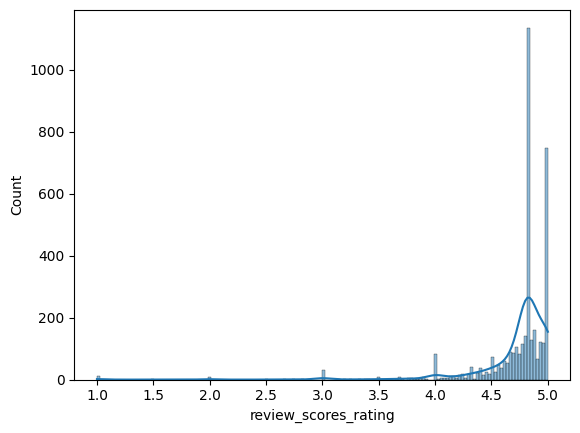

In [24]:
sns.histplot(df_listings['review_scores_rating'], kde=True)
plt.show()

In [25]:
threshold = df_listings['review_scores_rating'].quantile(0.70)
threshold

4.88

In [26]:
df_listings['highly_rated'] = df_listings['review_scores_rating'] >= threshold
df_listings

id       scrape_id  \
0                    3781  20231218233145   
1                    5506  20231218233145   
2                    6695  20231218233145   
3                    8789  20231218233145   
4                   10813  20231218233145   
...                   ...             ...   
4199  1046563598019556549  20231218233145   
4200  1046568292864752336  20231218233145   
4201  1047166785349446101  20231218233145   
4202  1047226383263246733  20231218233145   
4203  1048051750111422883  20231218233145   

                                                   name  \
0     Rental unit in Boston · ★4.96 · 1 bedroom · 1 ...   
1     Guest suite in Boston · ★4.79 · 1 bedroom · 1 ...   
2     Condo in Boston · ★4.81 · Studio · 2 beds · 1 ...   
3     Rental unit in Boston · ★4.67 · 1 bedroom · 1 ...   
4     Rental unit in Boston · ★5.0 · Studio · 1 bed ...   
...                                                 ...   
4199  Rental unit in Boston · ★New · 2 bedrooms · 3 ...   
4200  Rental unit in Boston · ★New · 1 bedroom · 3 b...   
4201  Rental unit in Boston · ★New · 1 bedroom · 2 b...   
4202  Rental unit in Boston · ★New · 2 bedrooms · 3 ...   
4203  Rental unit in Boston · ★New · 1 bedroom · 1 b...   

                                  neighborhood_overview    host_id  \
0     Mostly quiet ( no loud music, no crowed sidewa...       4804   
1     Peaceful, Architecturally interesting, histori...       8229   
2     Peaceful, Architecturally interesting, histori...       8229   
3     Beacon Hill is a historic neighborhood filled ...      26988   
4     Wander around this quintessential neighborhood...      38997   
...                                                 ...        ...   
4199                                            Unknown  212359760   
4200                                            Unknown  212359760   
4201  With its brownstones, Boston Marathon finish l...  233908696   
4202                                            Unknown  212359760   
4203                                            Unknown  108724738   

      host_since                                         host_about  \
0     2008/12/03  My wife and I and grown children frequently oc...   
1     2009/02/19              Relaxed,  Easy going, Accommodating.    
2     2009/02/19              Relaxed,  Easy going, Accommodating.    
3     2009/07/22  I manage a number of furnished units around Bo...   
4     2009/09/16                                            Unknown   
...          ...                                                ...   
4199  2018/08/29  Whether you are just getting away for the week...   
4200  2018/08/29  Whether you are just getting away for the week...   
4201  2019/01/02  Hello! We are Airbnb Queen! We started hosting...   
4202  2018/08/29  Whether you are just getting away for the week...   
4203  2016/12/27   Enjoy your stay. Im here to help. Diogo DeAraujo   

     host_response_time host_response_rate host_acceptance_rate  ...  \
0          within a day                90%                  29%  ...   
1        within an hour               100%                 100%  ...   
2        within an hour               100%                 100%  ...   
3          within a day                90%                  50%  ...   
4        within an hour                98%                  46%  ...   
...                 ...                ...                  ...  ...   
4199     within an hour               100%                  98%  ...   
4200     within an hour               100%                  98%  ...   
4201     within an hour                94%                 100%  ...   
4202     within an hour               100%                  98%  ...   
4203     within an hour               100%                  99%  ...   

     review_scores_communication review_scores_location review_scores_value  \
0                           4.96                   4.88                4.92   
1                           4.89                   4.55 

We set the 70% as the threshold, and find whether each listing's rating meets or exceeds this threshold.

### **Check outliers for listing csv**

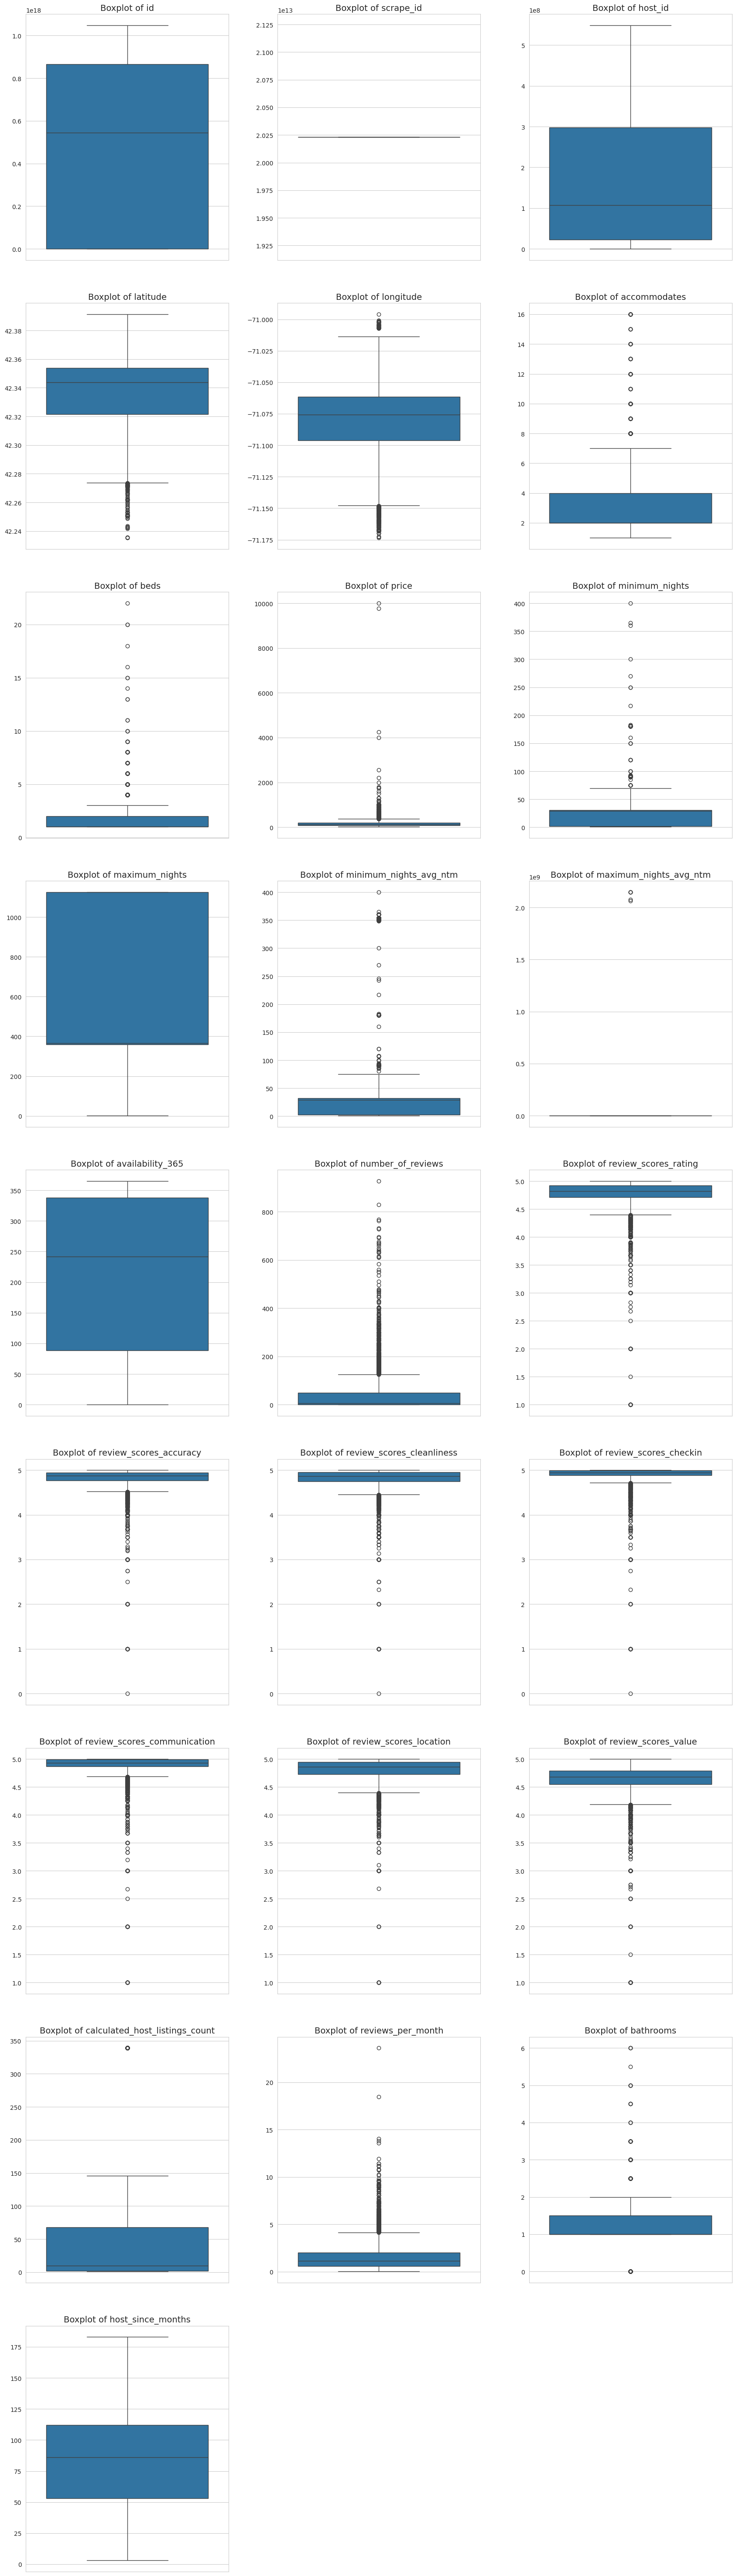

In [27]:
sns.set_style('whitegrid')

fig, axes = plt.subplots(nrows=len(df_listings.columns) // 3, ncols=3, figsize=(18, 100))
fig.tight_layout(pad=5.0)

axes = axes.flatten()

for i, col in enumerate(df_listings.select_dtypes(include=['float64', 'int64']).columns):
    sns.boxplot(y=col, data=df_listings, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=14)
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')

for ax in axes[len(df_listings.select_dtypes(include=['float64', 'int64']).columns):]:
    ax.set_visible(False)

plt.show()

From the study of this set of pair plots, we find out that there are many outliers. The following cleaning steps are done based on our study of the dataset.

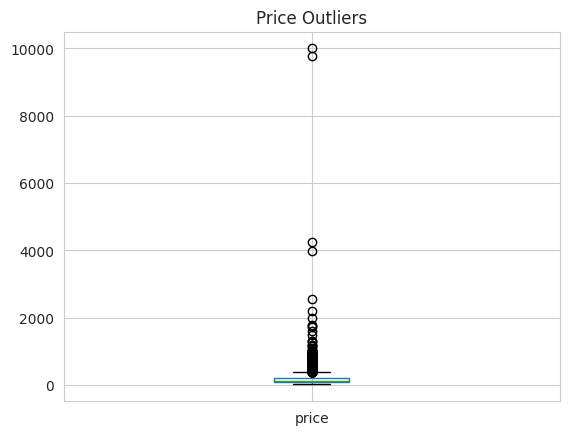

In [28]:
df_listings.boxplot(column='price')
plt.title('Price Outliers')
plt.show()

In [29]:
q995 = df_listings['price'].quantile(0.995)
outliers = df_listings[df_listings['price'] > q995]
print(outliers['price'])

488      3999.0
616      1600.0
800      1150.0
891      4245.0
1146     1200.0
1184     2557.0
1373    10000.0
1945     1293.0
2783     2200.0
2829     1500.0
2894     1729.0
2900     1300.0
2952     1300.0
2956     1200.0
3191     1159.0
3281     1100.0
3282     1800.0
3584     1758.0
3589     9770.0
3819     2000.0
Name: price, dtype: float64


In [30]:
df_listings = df_listings[df_listings['price'] <= q995]

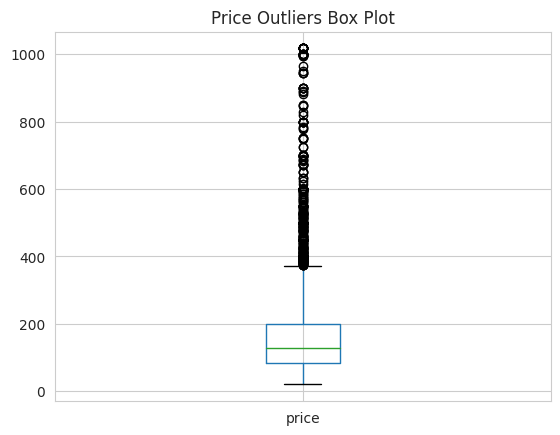

In [31]:
df_listings.boxplot(column='price')
plt.title('Price Outliers Box Plot')
plt.show()

Upon reviewing the dataset, we identified an outlier, specifically a listing priced at $10,000. This appears to be an anomaly likely caused by an input error or a deliberate attempt to skew the Airbnb data. To maintain the integrity of our analysis, we have decided to cap the dataset at the 99.5th percentile, effectively removing such extreme data points and ensuring a more accurate representation of the market.

In [32]:
unknown_neighborhood_overview = df_listings['neighborhood_overview'].value_counts().get("Unknown", 0)
unknown_host_about = df_listings['host_about'].value_counts().get("Unknown", 0)

total_unknowns = unknown_neighborhood_overview + unknown_host_about
print(f"Number of 'Unknown' in 'neighborhood_overview': {unknown_neighborhood_overview}")
print(f"Number of 'Unknown' in 'host_about': {unknown_host_about}")
print(f"Total 'Unknown' values in both columns: {total_unknowns}")

Number of 'Unknown' in 'neighborhood_overview': 1298
Number of 'Unknown' in 'host_about': 1060
Total 'Unknown' values in both columns: 2358


In [33]:
df_listings = df_listings[
    (df_listings['neighborhood_overview'] != "Unknown") &
    (df_listings['host_about'] != "Unknown")
]

In [34]:
df_listings

id       scrape_id  \
0                    3781  20231218233145   
1                    5506  20231218233145   
2                    6695  20231218233145   
3                    8789  20231218233145   
6                   18711  20231218233145   
...                   ...             ...   
4194  1045997580495005942  20231218233145   
4196  1046356755567106626  20231218233145   
4197  1046470991404568874  20231218233145   
4198  1046490108856067836  20231218233145   
4201  1047166785349446101  20231218233145   

                                                   name  \
0     Rental unit in Boston · ★4.96 · 1 bedroom · 1 ...   
1     Guest suite in Boston · ★4.79 · 1 bedroom · 1 ...   
2     Condo in Boston · ★4.81 · Studio · 2 beds · 1 ...   
3     Rental unit in Boston · ★4.67 · 1 bedroom · 1 ...   
6     Rental unit in Boston · ★4.31 · 3 bedrooms · 3...   
...                                                 ...   
4194  Rental unit in Boston · ★New · 1 bedroom · 1 b...   
4196  Rental unit in Boston · ★New · Studio · 1 bed ...   
4197  Rental unit in Boston · ★New · Studio · 1 bed ...   
4198  Rental unit in Boston · ★New · Studio · 1 bed ...   
4201  Rental unit in Boston · ★New · 1 bedroom · 2 b...   

                                  neighborhood_overview    host_id  \
0     Mostly quiet ( no loud music, no crowed sidewa...       4804   
1     Peaceful, Architecturally interesting, histori...       8229   
2     Peaceful, Architecturally interesting, histori...       8229   
3     Beacon Hill is a historic neighborhood filled ...      26988   
6     Once its own city, Dorchester is now Boston’s ...      71783   
...                                                 ...        ...   
4194  Experience the best of Boston at Maverick Suit...   22348222   
4196  This apartment is located on the southeastern ...  275849638   
4197  This apartment is located on the southeastern ...  365116307   
4198  This apartment is located on the southeastern ...  365116307   
4201  With its brownstones, Boston Marathon finish l...  233908696   

      host_since                                         host_about  \
0     2008/12/03  My wife and I and grown children frequently oc...   
1     2009/02/19              Relaxed,  Easy going, Accommodating.    
2     2009/02/19              Relaxed,  Easy going, Accommodating.    
3     2009/07/22  I manage a number of furnished units around Bo...   
6     2010/01/19  Lance R. Swank, Principal\r\n\r\nHis units off...   
...          ...                                                ...   
4194  2014/10/09  Welcome to our profile, and allow us to introd...   
4196  2019/07/13  Healing Homes of Boston's mission is to provid...   
4197  2020/08/30  Healing Homes of Boston's mission it to provid...   
4198  2020/08/30  Healing Homes of Boston's mission it to provid...   
4201  2019/01/02  Hello! We are Airbnb Queen! We started hosting...   

      host_response_time host_response_rate host_acceptance_rate  ...  \
0           within a day                90%                  29%  ...   
1         within an hour               100%                 100%  ...   
2         within an hour               100%                 100%  ...   
3           within a day                90%                  50%  ...   
6     a few days or more                40%                  95%  ...   
...                  ...                ...                  ...  ...   
4194      within an hour                98%                  99%  ...   
4196      within an hour               100%                 100%  ...   
4197      within an hour               100%                 100%  ...   
4198      within an hour               100%                 100%  ...   
4201      within an hour                94%                 100%  ...   

     review_scores_communication review_scores_location review_scores_value  \
0                           4.96                   4.88                4.92   
1                           4.89            

As we can see, there are more than 2000 "Unknown" which will not provide us with any insights. The decision is to drop all "Unknown".

In [35]:
exclude_columns = ['id', 'scrape_id', 'host_id']
numerical_columns_for_description = [col for col in num_fill if col not in exclude_columns]

description_filtered = df_listings[numerical_columns_for_description].describe()
description_filtered

latitude    longitude  accommodates         beds        price  \
count  2036.000000  2036.000000   2036.000000  2036.000000  2036.000000   
mean     42.337250   -71.081245      3.123281     1.741650   168.413065   
std       0.024451     0.028425      2.261966     1.564676   127.393803   
min      42.235330   -71.170070      1.000000     1.000000    26.000000   
25%      42.327078   -71.093682      2.000000     1.000000    90.000000   
50%      42.343668   -71.076330      2.000000     1.000000   135.000000   
75%      42.351512   -71.062090      4.000000     2.000000   201.250000   
max      42.390720   -71.003760     16.000000    20.000000  1000.000000   

       minimum_nights  maximum_nights  minimum_nights_avg_ntm  \
count     2036.000000     2036.000000             2036.000000   
mean        23.160118      637.013261               75.993910   
std         28.742402      445.996175              125.495808   
min          1.000000        2.000000                1.000000   
25%          1.000000      360.000000                2.400000   
50%         29.000000      365.000000               29.000000   
75%         32.000000     1125.000000               58.975000   
max        365.000000     1125.000000              365.000000   

       maximum_nights_avg_ntm  availability_365  ...  review_scores_accuracy  \
count            2.036000e+03       2036.000000  ...             2036.000000   
mean             1.014340e+06        212.081532  ...                4.781601   
std              4.573281e+07        130.746796  ...                0.362010   
min              2.000000e+00          0.000000  ...                1.000000   
25%              3.650000e+02         88.000000  ...                4.780000   
50%              1.125000e+03        246.000000  ...                4.870000   
75%              1.125000e+03        335.000000  ...                4.940000   
max              2.063559e+09        365.000000  ...                5.000000   

       review_scores_cleanliness  review_scores_checkin  \
count                2036.000000            2036.000000   
mean                    4.772898               4.856925   
std                     0.348506               0.354941   
min                     1.000000               1.000000   
25%                     4.760000               4.880000   
50%                     4.860000               4.940000   
75%                     4.950000               4.980000   
max                     5.000000               5.000000   

       review_scores_communication  review_scores_location  \
count                  2036.000000             2036.000000   
mean                      4.836832                4.784401   
std                       0.364422                0.321902   
min                       1.000000                1.000000   
25%                       4.870000                4.750000   
50%                       4.930000                4.860000   
75%                       4.980000                4.950000   
max                       5.000000                5.000000   

       review_scores_value  calculated_host_listings_count  reviews_per_month  \
count          2036.000000                     2036.000000        2036.000000   
mean              4.590201                       79.456778           1.736459   
std               0.439845                      118.751232           1.676496   
min               1.000000                        1.000000           0.010000   
25%               4.540000                        3.000000           0.740000   
50%               4.680000                       25.000000           1.140000   
75%               4.790000                       74.000000           2.262500   
max               5.000000                      339.000000          11.410000   

         bathrooms  host_since_months  
count  2036.000000        2036.000000  
mean      1.218811          88.332024  
std       0.554973          38.585898  
min       0.000000           4.000000  
25%   

In [36]:
num_column=['host_since_months','host_response_rate','host_acceptance_rate','latitude','longitude','price','minimum_nights_avg_ntm','maximum_nights_avg_ntm','number_of_reviews','review_scores_rating','reviews_per_month']
cate_column=['host_response_time','host_is_superhost','host_has_profile_pic','host_identity_verified','neighbourhood_cleansed','room_type','accommodates','beds','has_availability','availability_365','bathrooms','highly_rated']
text_column=['id','neighborhood_overview','host_about']
df_num = df_listings[num_column]
df_cate = df_listings[cate_column]
df_text = df_listings[text_column]

Sepreate numerical, categorical and text columns.

In [37]:
num_colum=pd.DataFrame(df_num)
num_colum

host_since_months host_response_rate host_acceptance_rate   latitude  \
0                   183                90%                  29%  42.364130   
1                   180               100%                 100%  42.328440   
2                   180               100%                 100%  42.328020   
3                   175                90%                  50%  42.358670   
6                   169                40%                  95%  42.322120   
...                 ...                ...                  ...        ...   
4194                112                98%                  99%  42.344775   
4196                 55               100%                 100%  42.342861   
4197                 42               100%                 100%  42.341960   
4198                 42               100%                 100%  42.343800   
4201                 62                94%                 100%  42.347480   

      longitude  price  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
0    -71.029910  125.0                    29.0                  1125.0   
1    -71.095810  135.0                     3.0                  1125.0   
2    -71.093870  179.0                     3.0                   730.0   
3    -71.063070   91.0                    91.0                   365.0   
6    -71.060960  139.0                    30.0                  1125.0   
...         ...    ...                     ...                     ...   
4194 -71.089708   64.0                     2.3                   365.0   
4196 -71.082917   72.0                     3.2                   365.0   
4197 -71.082440   72.0                     3.2                   365.0   
4198 -71.083930   88.0                     3.2                   365.0   
4201 -71.090780  136.0                     2.0                   365.0   

      number_of_reviews  review_scores_rating  reviews_per_month  
0                    24                  4.96               0.23  
1                   122                  4.79               0.68  
2                   127                  4.81               0.73  
3                    27                  4.67               0.24  
6                    52                  4.31               0.31  
...                 ...                   ...                ...  
4194                  0                  4.82               1.14  
4196                  0                  4.82               1.14  
4197                  0                  4.82               1.14  
4198                  0                  4.82               1.14  
4201                  0                  4.82               1.14  

[2036 rows x 11 columns]

Turn percentage to decimals

In [38]:
num_colum['host_response_rate'] = num_colum['host_response_rate'].str.replace('%', '').astype(float) / 100
num_colum['host_acceptance_rate'] = num_colum['host_acceptance_rate'].str.replace('%', '').astype(float) / 100
num_colum[['host_acceptance_rate']].head()

host_acceptance_rate
0                  0.29
1                  1.00
2                  1.00
3                  0.50
6                  0.95

In [39]:
num_colum[['host_response_rate']].head()

host_response_rate
0                 0.9
1                 1.0
2                 1.0
3                 0.9
6                 0.4

In [40]:
num_colum

host_since_months  host_response_rate  host_acceptance_rate   latitude  \
0                   183                0.90                  0.29  42.364130   
1                   180                1.00                  1.00  42.328440   
2                   180                1.00                  1.00  42.328020   
3                   175                0.90                  0.50  42.358670   
6                   169                0.40                  0.95  42.322120   
...                 ...                 ...                   ...        ...   
4194                112                0.98                  0.99  42.344775   
4196                 55                1.00                  1.00  42.342861   
4197                 42                1.00                  1.00  42.341960   
4198                 42                1.00                  1.00  42.343800   
4201                 62                0.94                  1.00  42.347480   

      longitude  price  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
0    -71.029910  125.0                    29.0                  1125.0   
1    -71.095810  135.0                     3.0                  1125.0   
2    -71.093870  179.0                     3.0                   730.0   
3    -71.063070   91.0                    91.0                   365.0   
6    -71.060960  139.0                    30.0                  1125.0   
...         ...    ...                     ...                     ...   
4194 -71.089708   64.0                     2.3                   365.0   
4196 -71.082917   72.0                     3.2                   365.0   
4197 -71.082440   72.0                     3.2                   365.0   
4198 -71.083930   88.0                     3.2                   365.0   
4201 -71.090780  136.0                     2.0                   365.0   

      number_of_reviews  review_scores_rating  reviews_per_month  
0                    24                  4.96               0.23  
1                   122                  4.79               0.68  
2                   127                  4.81               0.73  
3                    27                  4.67               0.24  
6                    52                  4.31               0.31  
...                 ...                   ...                ...  
4194                  0                  4.82               1.14  
4196                  0                  4.82               1.14  
4197                  0                  4.82               1.14  
4198                  0                  4.82               1.14  
4201                  0                  4.82               1.14  

[2036 rows x 11 columns]

Drop "latitude" and "longitude" because we do not want to use them for correlation analysis.

In [41]:
from scipy.stats import shapiro

for column in num_colum.columns:
    data = num_colum[column]
    stat, p = shapiro(num_colum)
    print(f'Column: {column}, Statistics={stat:.3f}, p={p:.3f}')

    alpha = 0.05
    if p > alpha:
        print(f'Column {column} looks Gaussian (fail to reject H0)')
    else:
        print(f'Column {column} does not look Gaussian (reject H0)')

Column: host_since_months, Statistics=0.001, p=0.000
Column host_since_months does not look Gaussian (reject H0)
Column: host_response_rate, Statistics=0.001, p=0.000
Column host_response_rate does not look Gaussian (reject H0)
Column: host_acceptance_rate, Statistics=0.001, p=0.000
Column host_acceptance_rate does not look Gaussian (reject H0)
Column: latitude, Statistics=0.001, p=0.000
Column latitude does not look Gaussian (reject H0)
Column: longitude, Statistics=0.001, p=0.000
Column longitude does not look Gaussian (reject H0)
Column: price, Statistics=0.001, p=0.000
Column price does not look Gaussian (reject H0)
Column: minimum_nights_avg_ntm, Statistics=0.001, p=0.000
Column minimum_nights_avg_ntm does not look Gaussian (reject H0)
Column: maximum_nights_avg_ntm, Statistics=0.001, p=0.000
Column maximum_nights_avg_ntm does not look Gaussian (reject H0)
Column: number_of_reviews, Statistics=0.001, p=0.000
Column number_of_reviews does not look Gaussian (reject H0)
Column: revie

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [42]:
columns_temp_drop = ['latitude','longitude','host_response_rate', 'host_acceptance_rate']
num_graph = num_colum.drop(columns=columns_temp_drop)
num_graph = pd.DataFrame(num_graph)
num_graph

host_since_months  price  minimum_nights_avg_ntm  \
0                   183  125.0                    29.0   
1                   180  135.0                     3.0   
2                   180  179.0                     3.0   
3                   175   91.0                    91.0   
6                   169  139.0                    30.0   
...                 ...    ...                     ...   
4194                112   64.0                     2.3   
4196                 55   72.0                     3.2   
4197                 42   72.0                     3.2   
4198                 42   88.0                     3.2   
4201                 62  136.0                     2.0   

      maximum_nights_avg_ntm  number_of_reviews  review_scores_rating  \
0                     1125.0                 24                  4.96   
1                     1125.0                122                  4.79   
2                      730.0                127                  4.81   
3                      365.0                 27                  4.67   
6                     1125.0                 52                  4.31   
...                      ...                ...                   ...   
4194                   365.0                  0                  4.82   
4196                   365.0                  0                  4.82   
4197                   365.0                  0                  4.82   
4198                   365.0                  0                  4.82   
4201                   365.0                  0                  4.82   

      reviews_per_month  
0                  0.23  
1                  0.68  
2                  0.73  
3                  0.24  
6                  0.31  
...                 ...  
4194               1.14  
4196               1.14  
4197               1.14  
4198               1.14  
4201               1.14  

[2036 rows x 7 columns]

Normalize the data.

In [43]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler(feature_range=(0, 1))
num_graph_normalized = scaler.fit_transform(num_graph)
num_graph_normalized = pd.DataFrame(num_graph_normalized, columns=num_graph.columns)
num_graph_normalized.head()

host_since_months     price  minimum_nights_avg_ntm  \
0           1.000000  0.101643                0.076923   
1           0.983240  0.111910                0.005495   
2           0.983240  0.157084                0.005495   
3           0.955307  0.066735                0.247253   
4           0.921788  0.116016                0.079670   

   maximum_nights_avg_ntm  number_of_reviews  review_scores_rating  \
0            5.442054e-07           0.025890                0.9900   
1            5.442054e-07           0.131607                0.9475   
2            3.527885e-07           0.137001                0.9525   
3            1.759097e-07           0.029126                0.9175   
4            5.442054e-07           0.056095                0.8275   

   reviews_per_month  
0           0.019298  
1           0.058772  
2           0.063158  
3           0.020175  
4           0.026316

In [44]:
num_graph_normalized

host_since_months     price  minimum_nights_avg_ntm  \
0              1.000000  0.101643                0.076923   
1              0.983240  0.111910                0.005495   
2              0.983240  0.157084                0.005495   
3              0.955307  0.066735                0.247253   
4              0.921788  0.116016                0.079670   
...                 ...       ...                     ...   
2031           0.603352  0.039014                0.003571   
2032           0.284916  0.047228                0.006044   
2033           0.212291  0.047228                0.006044   
2034           0.212291  0.063655                0.006044   
2035           0.324022  0.112936                0.002747   

      maximum_nights_avg_ntm  number_of_reviews  review_scores_rating  \
0               5.442054e-07           0.025890                0.9900   
1               5.442054e-07           0.131607                0.9475   
2               3.527885e-07           0.137001                0.9525   
3               1.759097e-07           0.029126                0.9175   
4               5.442054e-07           0.056095                0.8275   
...                      ...                ...                   ...   
2031            1.759097e-07           0.000000                0.9550   
2032            1.759097e-07           0.000000                0.9550   
2033            1.759097e-07           0.000000                0.9550   
2034            1.759097e-07           0.000000                0.9550   
2035            1.759097e-07           0.000000                0.9550   

      reviews_per_month  
0              0.019298  
1              0.058772  
2              0.063158  
3              0.020175  
4              0.026316  
...                 ...  
2031           0.099123  
2032           0.099123  
2033           0.099123  
2034           0.099123  
2035           0.099123  

[2036 rows x 7 columns]

### **Heatmap**

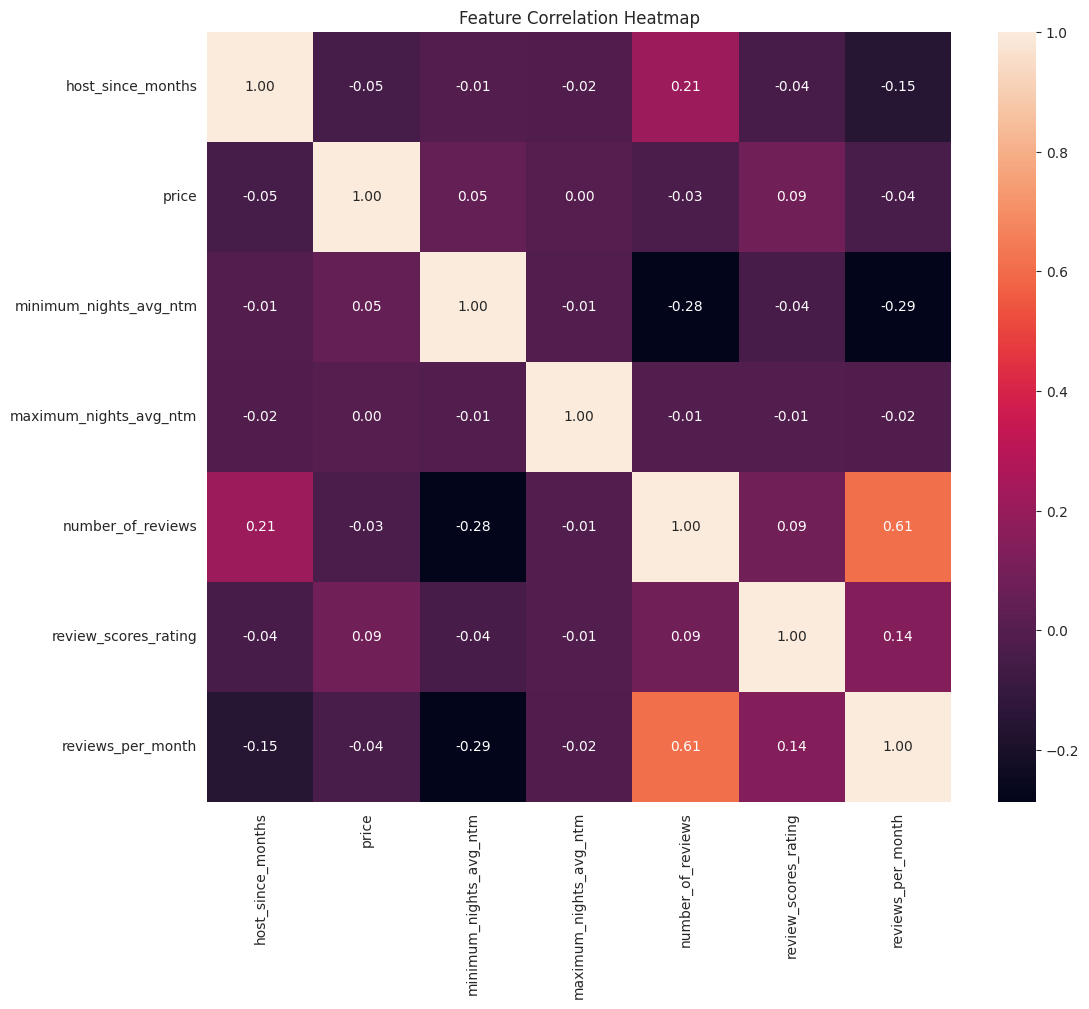

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = num_graph_normalized.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

There are too many attributes and data points for us to run pairplot with over 500 random samples. Therefore, we decide not to use specific attributes to run cluster, but to use PCA to achieve dimension reduction.

### **Pairplot**

In [90]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# sampled_df = num_graph_normalized.sample(n=400, random_state=42)
# sns.set(style="ticks", color_codes=True)
# pair_plot = sns.pairplot(sampled_df)
# # plt.savefig("pairplot_sampled.png")

# plt.show()

Due to the size of the numerical data, we decide to capture a sample to draw the pairplot.

### **Categorical data manipulation**

In [91]:
unique = df_cate.apply(lambda col: col.unique())
pd.DataFrame(unique)

0
host_response_time      [within a day, within an hour, a few days or m...
host_is_superhost                                                  [t, f]
host_has_profile_pic                                                  [t]
host_identity_verified                                             [f, t]
neighbourhood_cleansed  [East Boston, Roxbury, Beacon Hill, Dorchester...
room_type                    [Entire home/apt, Private room, Shared room]
accommodates            [2, 4, 7, 3, 1, 6, 9, 5, 10, 8, 12, 16, 11, 14...
beds                    [1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 9.0, 6.0, 8.0, ...
has_availability                                                      [t]
availability_365        [271, 87, 107, 237, 245, 2, 282, 259, 179, 104...
bathrooms               [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 0.0, 4.5, 5.0, ...
highly_rated                                                [True, False]

In [92]:
df_listings.drop(columns=['host_has_profile_pic'], inplace=True)

In [93]:
df_cate

host_response_time host_is_superhost host_has_profile_pic  \
0           within a day                 t                    t   
1         within an hour                 t                    t   
2         within an hour                 t                    t   
3           within a day                 t                    t   
6     a few days or more                 f                    t   
...                  ...               ...                  ...   
4194      within an hour                 f                    t   
4196      within an hour                 f                    t   
4197      within an hour                 t                    t   
4198      within an hour                 t                    t   
4201      within an hour                 f                    t   

     host_identity_verified neighbourhood_cleansed        room_type  \
0                         f            East Boston  Entire home/apt   
1                         t                Roxbury  Entire home/apt   
2                         t                Roxbury  Entire home/apt   
3                         t            Beacon Hill  Entire home/apt   
6                         t             Dorchester  Entire home/apt   
...                     ...                    ...              ...   
4194                      t                 Fenway  Entire home/apt   
4196                      t               Back Bay  Entire home/apt   
4197                      t              South End  Entire home/apt   
4198                      t               Back Bay  Entire home/apt   
4201                      f                 Fenway  Entire home/apt   

      accommodates  beds has_availability  availability_365  bathrooms  \
0                2   1.0                t               271        1.0   
1                2   1.0                t                87        1.0   
2                4   2.0                t               107        1.0   
3                2   1.0                t               237        1.0   
6                7   3.0                t               245        1.0   
...            ...   ...              ...               ...        ...   
4194             2   1.0                t               348        1.0   
4196             2   1.0                t               251        1.0   
4197             2   1.0                t               270        1.0   
4198             2   1.0                t               270        1.0   
4201             3   2.0                t                35        1.0   

      highly_rated  
0             True  
1            False  
2            False  
3            False  
6            False  
...            ...  
4194         False  
4196         False  
4197         False  
4198         False  
4201         False  

[2036 rows x 12 columns]

In [94]:
df_cate = df_cate.astype('category')
df_cate['host_is_superhost'].cat.categories

Index(['f', 't'], dtype='object')

In [95]:
for c in df_cate.columns:
  df_cate[c] = df_cate[c].cat.codes
df_cate

host_response_time  host_is_superhost  host_has_profile_pic  \
0                      1                  1                     0   
1                      3                  1                     0   
2                      3                  1                     0   
3                      1                  1                     0   
6                      0                  0                     0   
...                  ...                ...                   ...   
4194                   3                  0                     0   
4196                   3                  0                     0   
4197                   3                  1                     0   
4198                   3                  1                     0   
4201                   3                  0                     0   

      host_identity_verified  neighbourhood_cleansed  room_type  accommodates  \
0                          0                       9          0             1   
1                          1                      18          0             1   
2                          1                      18          0             3   
3                          1                       3          0             1   
6                          1                       7          0             6   
...                      ...                     ...        ...           ...   
4194                       1                      10          0             1   
4196                       1                       1          0             1   
4197                       1                      21          0             1   
4198                       1                       1          0             1   
4201                       0                      10          0             2   

      beds  has_availability  availability_365  bathrooms  highly_rated  
0        0                 0               241          1             1  
1        0                 0                77          1             0  
2        1                 0                94          1             0  
3        0                 0               208          1             0  
6        2                 0               216          1             0  
...    ...               ...               ...        ...           ...  
4194     0                 0               318          1             0  
4196     0                 0               222          1             0  
4197     0                 0               240          1             0  
4198     0                 0               240          1             0  
4201     1                 0                27          1             0  

[2036 rows x 12 columns]

In [96]:
df_cate=df_cate.reset_index(drop=True)
df_cate

host_response_time  host_is_superhost  host_has_profile_pic  \
0                      1                  1                     0   
1                      3                  1                     0   
2                      3                  1                     0   
3                      1                  1                     0   
4                      0                  0                     0   
...                  ...                ...                   ...   
2031                   3                  0                     0   
2032                   3                  0                     0   
2033                   3                  1                     0   
2034                   3                  1                     0   
2035                   3                  0                     0   

      host_identity_verified  neighbourhood_cleansed  room_type  accommodates  \
0                          0                       9          0             1   
1                          1                      18          0             1   
2                          1                      18          0             3   
3                          1                       3          0             1   
4                          1                       7          0             6   
...                      ...                     ...        ...           ...   
2031                       1                      10          0             1   
2032                       1                       1          0             1   
2033                       1                      21          0             1   
2034                       1                       1          0             1   
2035                       0                      10          0             2   

      beds  has_availability  availability_365  bathrooms  highly_rated  
0        0                 0               241          1             1  
1        0                 0                77          1             0  
2        1                 0                94          1             0  
3        0                 0               208          1             0  
4        2                 0               216          1             0  
...    ...               ...               ...        ...           ...  
2031     0                 0               318          1             0  
2032     0                 0               222          1             0  
2033     0                 0               240          1             0  
2034     0                 0               240          1             0  
2035     1                 0                27          1             0  

[2036 rows x 12 columns]

combine all dataframes

In [97]:
df_listings_corrected = pd.concat([num_graph_normalized, df_cate], axis=1)
df_listings_corrected

host_since_months     price  minimum_nights_avg_ntm  \
0              1.000000  0.101643                0.076923   
1              0.983240  0.111910                0.005495   
2              0.983240  0.157084                0.005495   
3              0.955307  0.066735                0.247253   
4              0.921788  0.116016                0.079670   
...                 ...       ...                     ...   
2031           0.603352  0.039014                0.003571   
2032           0.284916  0.047228                0.006044   
2033           0.212291  0.047228                0.006044   
2034           0.212291  0.063655                0.006044   
2035           0.324022  0.112936                0.002747   

      maximum_nights_avg_ntm  number_of_reviews  review_scores_rating  \
0               5.442054e-07           0.025890                0.9900   
1               5.442054e-07           0.131607                0.9475   
2               3.527885e-07           0.137001                0.9525   
3               1.759097e-07           0.029126                0.9175   
4               5.442054e-07           0.056095                0.8275   
...                      ...                ...                   ...   
2031            1.759097e-07           0.000000                0.9550   
2032            1.759097e-07           0.000000                0.9550   
2033            1.759097e-07           0.000000                0.9550   
2034            1.759097e-07           0.000000                0.9550   
2035            1.759097e-07           0.000000                0.9550   

      reviews_per_month  host_response_time  host_is_superhost  \
0              0.019298                   1                  1   
1              0.058772                   3                  1   
2              0.063158                   3                  1   
3              0.020175                   1                  1   
4              0.026316                   0                  0   
...                 ...                 ...                ...   
2031           0.099123                   3                  0   
2032           0.099123                   3                  0   
2033           0.099123                   3                  1   
2034           0.099123                   3                  1   
2035           0.099123                   3                  0   

      host_has_profile_pic  host_identity_verified  neighbourhood_cleansed  \
0                        0                       0                       9   
1                        0                       1                      18   
2                        0                       1                      18   
3                        0                       1                       3   
4                        0                       1                       7   
...                    ...                     ...                     ...   
2031                     0                       1                      10   
2032                     0                       1                       1   
2033                     0                       1                      21   
2034                     0                       1                       1   
2035                     0                       0                      10   

      room_type  accommodates  beds  has_availability  availability_365  \
0             0             1     0                 0               241   
1             0             1     0                 0                77   
2             0             3     1                 0                94   
3             0             1     0                 0               208   
4             0             6     2                 0               216   
...         ...           ...   ...               ...               ...   
2031          0             1     0                 0               318   
2032          0             1     0                 0             

### **PCA**

<Axes: >

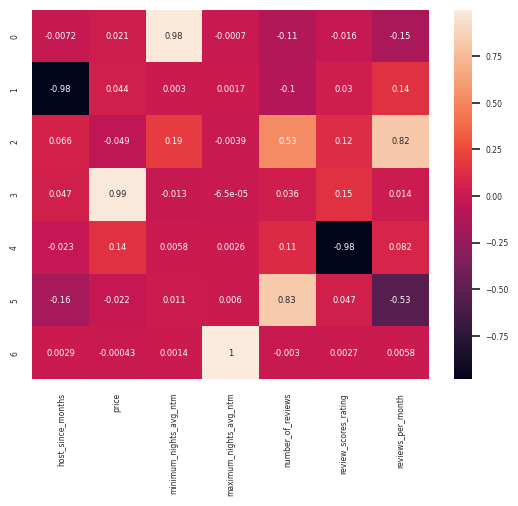

In [98]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(num_graph_normalized)
pca.components_.shape

df_components = pd.DataFrame(pca.components_, columns = num_graph_normalized.columns)

import seaborn as sns
sns.set(font_scale=0.5)
sns.heatmap(df_components, annot=True, )

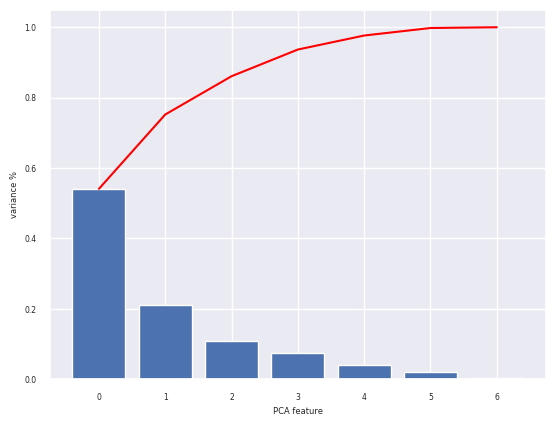

In [99]:
import matplotlib.pyplot as plt
component_ids = range(pca.n_components_)
plt.bar(component_ids, pca.explained_variance_ratio_)
plt.plot(component_ids, np.cumsum(pca.explained_variance_ratio_), color='red')
plt.xticks(component_ids)
plt.ylabel('variance %')
plt.xlabel('PCA feature')
plt.show()

In [100]:
import numpy as np
import plotly.express as px

fig = px.line(pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)))
fig.show()

By using scree plot, in order to contain 84% variance, we decide to use 3 components.

In [101]:
df_numeric_corrected_transformed_3D = pd.DataFrame(pca.transform(num_graph_normalized)[:, 0:3], columns=['PC1', 'PC2', 'PC3'])

fig = px.scatter_3d(df_numeric_corrected_transformed_3D, x='PC1', y='PC2', z='PC3',)
fig.update_traces(marker_size = 3)
fig.show()

In [102]:
df_numeric_corrected_transformed_3D_with_targets = pd.concat([df_numeric_corrected_transformed_3D, df_listings_corrected['highly_rated']], axis=1)

fig = px.scatter_3d(df_numeric_corrected_transformed_3D_with_targets, x='PC1', y='PC2', z='PC3', color='highly_rated')
fig.update_traces(marker_size = 3)
fig.show()

### **TSNE**

In [103]:
df_cate1 = df_cate.drop(['highly_rated'], axis=1)

In [104]:
from sklearn.manifold import TSNE

tsne_embedding = TSNE(n_components=3).fit_transform(df_cate1)
df_embeddings_with_categorical_and_targets = pd.concat([pd.DataFrame(tsne_embedding, columns=['tSNE1', 'tSNE2', 'tSNE3']), df_cate1 , df_listings_corrected['highly_rated']], axis=1)

In [105]:
df_embeddings_with_categorical_and_targets

tSNE1      tSNE2      tSNE3  host_response_time  host_is_superhost  \
0     -0.922534  -4.414567  10.843369                   1                  1   
1      8.407583  14.170083   1.104396                   3                  1   
2      7.878335  12.356923  -4.314183                   3                  1   
3      0.685462 -11.879091   1.914583                   1                  1   
4     -0.118112  -9.705888   3.999180                   0                  0   
...         ...        ...        ...                 ...                ...   
2031 -13.028351   1.777917  -4.953676                   3                  0   
2032   0.669530 -10.622733   6.516101                   3                  0   
2033  -4.219338  -4.172105   7.151339                   3                  1   
2034   1.253829  -6.147387  10.762197                   3                  1   
2035  12.499760   3.983561   5.781507                   3                  0   

      host_has_profile_pic  host_identity_verified  neighbourhood_cleansed  \
0                        0                       0                       9   
1                        0                       1                      18   
2                        0                       1                      18   
3                        0                       1                       3   
4                        0                       1                       7   
...                    ...                     ...                     ...   
2031                     0                       1                      10   
2032                     0                       1                       1   
2033                     0                       1                      21   
2034                     0                       1                       1   
2035                     0                       0                      10   

      room_type  accommodates  beds  has_availability  availability_365  \
0             0             1     0                 0               241   
1             0             1     0                 0                77   
2             0             3     1                 0                94   
3             0             1     0                 0               208   
4             0             6     2                 0               216   
...         ...           ...   ...               ...               ...   
2031          0             1     0                 0               318   
2032          0             1     0                 0               222   
2033          0             1     0                 0               240   
2034          0             1     0                 0               240   
2035          0             2     1                 0                27   

      bathrooms  highly_rated  
0             1             1  
1             1             0  
2             1             0  
3             1             0  
4             1             0  
...         ...           ...  
2031          1             0  
2032          1             0  
2033          1             0  
2034          1             0  
2035          1             0  

[2036 rows x 15 columns]

In [106]:
df_targets = pd.DataFrame(df_listings_corrected['highly_rated'])

In [107]:
color_column = 'highly_rated'
hover_columns = df_cate.columns | df_targets.columns
fig = px.scatter_3d(df_embeddings_with_categorical_and_targets, x='tSNE1', y='tSNE2', z='tSNE3', color=color_column, hover_data=hover_columns)
fig.update_traces(marker_size = 3)
fig.show()

<ipython-input-107-765ab8c0d2f5>:2: FutureWarning:

Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.



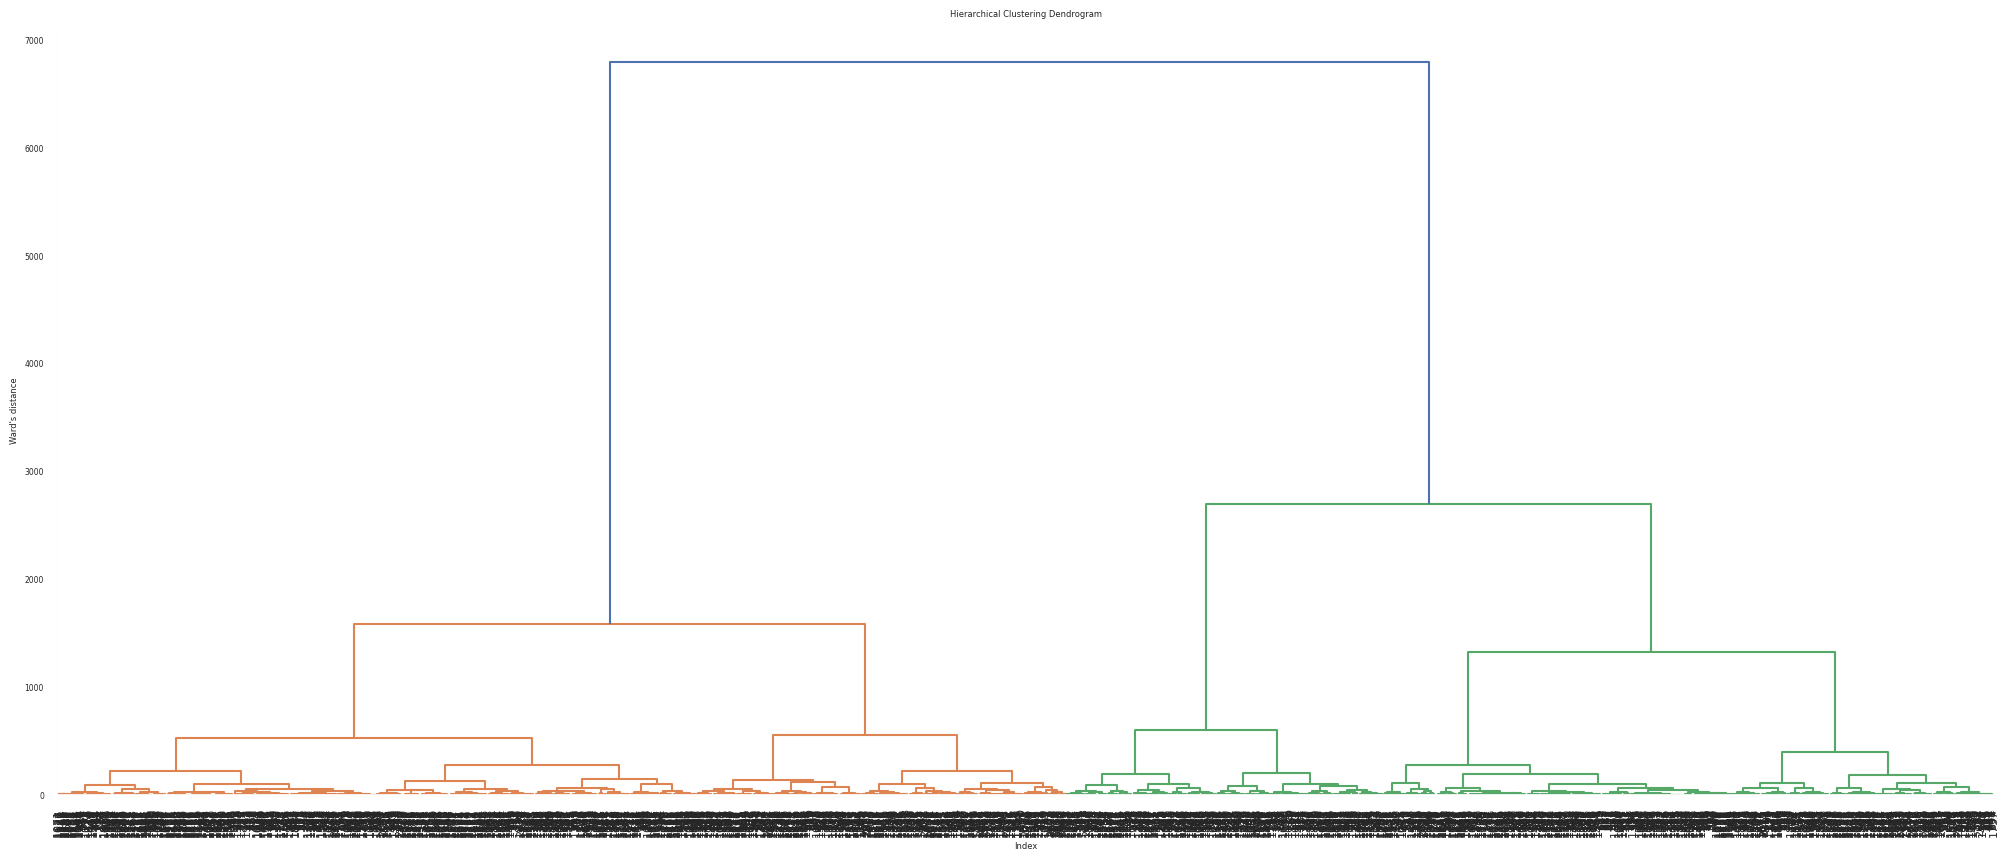

In [108]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(df_embeddings_with_categorical_and_targets, 'ward')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Ward\'s distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

In [109]:
num_clusters = 2

In [110]:
from scipy.cluster.hierarchy import fcluster

In [111]:
df_embeddings_with_categorical_and_targets['cluster_labels'] = fcluster(Z, num_clusters, criterion='maxclust')

In [112]:
color_column = 'cluster_labels'

# Assuming df_embeddings_with_categorical_and_targets already has 'tSNE1', 'tSNE2', and 'tSNE3' columns
# and hover_columns is defined as before
hover_columns = df_embeddings_with_categorical_and_targets.columns | df_targets.columns

# Plot with cluster_labels
fig = px.scatter_3d(df_embeddings_with_categorical_and_targets, x='tSNE1', y='tSNE2', z='tSNE3', color=color_column, hover_data=hover_columns)

# Update marker size as before
fig.update_traces(marker_size=3)

# Show the figure
fig.show()

<ipython-input-112-ff1d1d9dce09>:5: FutureWarning:

Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.



Check high rated

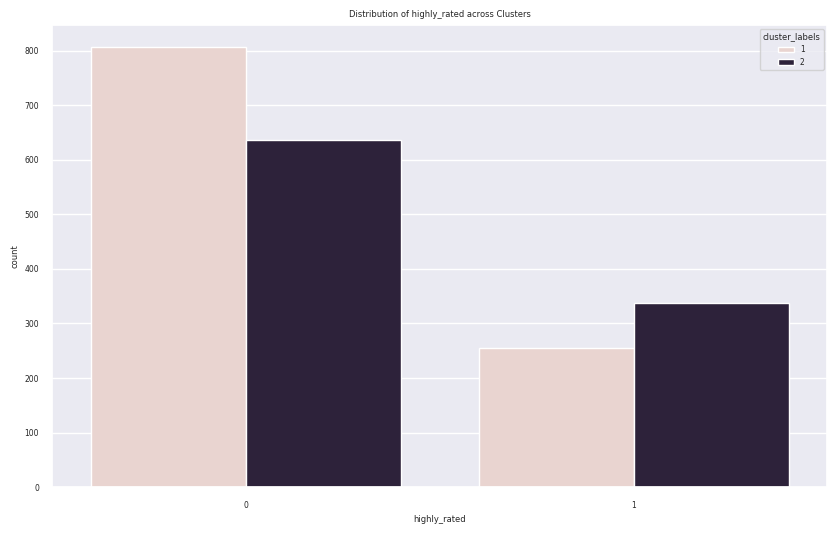

In [113]:
plt.figure(figsize=(10, 6))

# Create a count plot for the 'highly_rated' column with hue set to 'cluster_labels'
sns.countplot(x='highly_rated', hue='cluster_labels', data=df_embeddings_with_categorical_and_targets)

# Set the title of the plot
plt.title('Distribution of highly_rated across Clusters')

# Display the plot
plt.show()

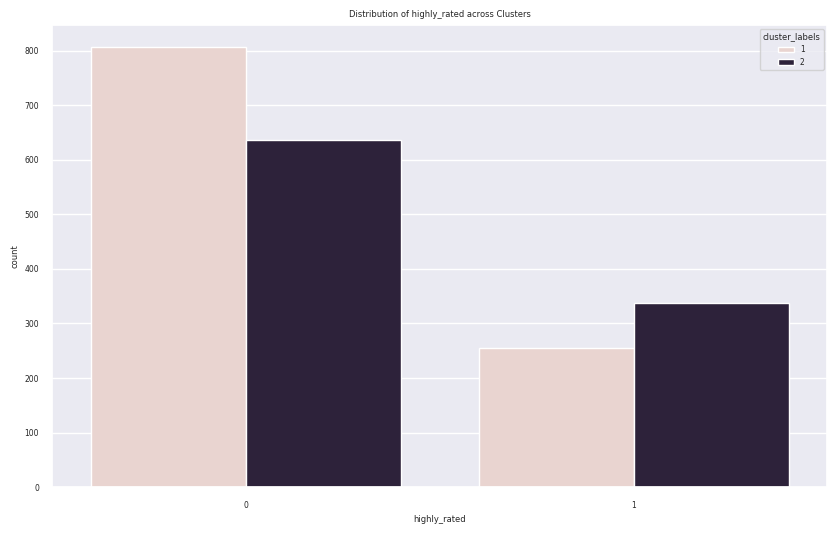

In [114]:
plt.figure(figsize=(10, 6))

# Create a count plot for the 'highly_rated' column with hue set to 'cluster_labels'
sns.countplot(x='highly_rated', hue='cluster_labels', data=df_embeddings_with_categorical_and_targets)

# Set the title of the plot
plt.title('Distribution of highly_rated across Clusters')

# Display the plot
plt.show()

### Market Basket Analysis

In [115]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [116]:
df_for_mba = pd.concat([df_cate1, df_listings_corrected[['highly_rated']]], axis=1)
df_for_mba

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



host_response_time  host_is_superhost  host_has_profile_pic  \
0                      1                  1                     0   
1                      3                  1                     0   
2                      3                  1                     0   
3                      1                  1                     0   
4                      0                  0                     0   
...                  ...                ...                   ...   
2031                   3                  0                     0   
2032                   3                  0                     0   
2033                   3                  1                     0   
2034                   3                  1                     0   
2035                   3                  0                     0   

      host_identity_verified  neighbourhood_cleansed  room_type  accommodates  \
0                          0                       9          0             1   
1                          1                      18          0             1   
2                          1                      18          0             3   
3                          1                       3          0             1   
4                          1                       7          0             6   
...                      ...                     ...        ...           ...   
2031                       1                      10          0             1   
2032                       1                       1          0             1   
2033                       1                      21          0             1   
2034                       1                       1          0             1   
2035                       0                      10          0             2   

      beds  has_availability  availability_365  bathrooms  highly_rated  
0        0                 0               241          1             1  
1        0                 0                77          1             0  
2        1                 0                94          1             0  
3        0                 0               208          1             0  
4        2                 0               216          1             0  
...    ...               ...               ...        ...           ...  
2031     0                 0               318          1             0  
2032     0                 0               222          1             0  
2033     0                 0               240          1             0  
2034     0                 0               240          1             0  
2035     1                 0                27          1             0  

[2036 rows x 12 columns]

In [117]:
df_for_mba=df_for_mba.drop(columns=['host_has_profile_pic', 'neighbourhood_cleansed', 'has_availability', 'availability_365'])

prefixes = ['response_time_prefix', 'beds_prefix', 'superhost_prefix', 'room_type_prefix', 'bathrooms_prefix', 'accommodates_prefix']
df_mba_encoded = pd.get_dummies(df_for_mba, columns=['host_response_time', 'beds', 'host_is_superhost', 'room_type', 'bathrooms', 'accommodates'], prefix=prefixes)
print(df_mba_encoded)

      host_identity_verified  highly_rated  response_time_prefix_0  \
0                          0             1                       0   
1                          1             0                       0   
2                          1             0                       0   
3                          1             0                       0   
4                          1             0                       1   
...                      ...           ...                     ...   
2031                       1             0                       0   
2032                       1             0                       0   
2033                       1             0                       0   
2034                       1             0                       0   
2035                       0             0                       0   

      response_time_prefix_1  response_time_prefix_2  response_time_prefix_3  \
0                          1                       0                       0   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [118]:
transactions = []

for index, row in df_mba_encoded.iterrows():
    transaction = []
    for col in df_mba_encoded.columns:
        if col != 'highly_rated' and row[col] == 1:
            transaction.append(col)
    if row['highly_rated'] == 1:
        transaction.append('highly_rated')
    transactions.append(transaction)

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df_transactions, min_support=0.001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.00000000001)
rules_filtered = rules[(rules['lift'] >= 1)]

single_item_rules = rules_filtered[
    rules_filtered['antecedents'].apply(lambda x: len(x) == 1) &
    rules_filtered['consequents'].apply(lambda x: x == {'highly_rated'})
]

sorted_rules = single_item_rules.sort_values(by=['support'], ascending=False)
print(sorted_rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



                  antecedents     consequents  antecedent support  \
693      (superhost_prefix_1)  (highly_rated)            0.324165   
689      (room_type_prefix_1)  (highly_rated)            0.243124   
567           (beds_prefix_1)  (highly_rated)            0.199902   
185   (accommodates_prefix_3)  (highly_rated)            0.156680   
457      (bathrooms_prefix_3)  (highly_rated)            0.136542   
683  (response_time_prefix_2)  (highly_rated)            0.087426   
425      (bathrooms_prefix_2)  (highly_rated)            0.058448   
147   (accommodates_prefix_2)  (highly_rated)            0.081041   
587           (beds_prefix_2)  (highly_rated)            0.071218   
253   (accommodates_prefix_5)  (highly_rated)            0.054028   
493      (bathrooms_prefix_4)  (highly_rated)            0.026523   
217   (accommodates_prefix_4)  (highly_rated)            0.034381   
607           (beds_prefix_3)  (highly_rated)            0.036837   
621           (beds_prefix_4)  (hi

In [119]:
sorted_rules = single_item_rules.sort_values(by=['support', 'lift'], ascending=False)
print(sorted_rules)

                  antecedents     consequents  antecedent support  \
693      (superhost_prefix_1)  (highly_rated)            0.324165   
689      (room_type_prefix_1)  (highly_rated)            0.243124   
567           (beds_prefix_1)  (highly_rated)            0.199902   
185   (accommodates_prefix_3)  (highly_rated)            0.156680   
457      (bathrooms_prefix_3)  (highly_rated)            0.136542   
425      (bathrooms_prefix_2)  (highly_rated)            0.058448   
683  (response_time_prefix_2)  (highly_rated)            0.087426   
147   (accommodates_prefix_2)  (highly_rated)            0.081041   
587           (beds_prefix_2)  (highly_rated)            0.071218   
253   (accommodates_prefix_5)  (highly_rated)            0.054028   
493      (bathrooms_prefix_4)  (highly_rated)            0.026523   
217   (accommodates_prefix_4)  (highly_rated)            0.034381   
607           (beds_prefix_3)  (highly_rated)            0.036837   
621           (beds_prefix_4)  (hi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### **Text Preprocessing**

Below, we conduct text preprocessing steps on review dataset.

In [45]:
!pip3 install nltk spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 55.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [45]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [46]:
df_reviews['comments'] = pd.DataFrame(df_reviews.comments.str.lower())
df_reviews['comments'] = pd.DataFrame(df_reviews.comments.str.strip())
df_reviews['comments'] = pd.DataFrame(df_reviews.comments.str.replace('[^\w\s]','', regex=True))

In [47]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

#def process_text(text):
#  tokens = word_tokenize(text)
#  process_token = []
#  for token in tokens:
#    if token not in stop_words:
#      lemma = lemmatizer.lemmatize(token)
#      process_token.append(lemma)
#  return tokens

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def process_text(text):
    tokens = word_tokenize(text)
    processed_token = []
    for token in tokens:
        if token not in stop_words:
            lemma = lemmatizer.lemmatize(token)
            processed_token.append(lemma)
    return processed_token

In [48]:
df_reviews['tokenized_comments'] = df_reviews['comments'].astype(str).apply(process_text)

In [49]:
df_reviews['tokenized_comments']

0         [apartment, advertised, frank, incredibly, hel...
1         [pleasure, stay, frank, place, place, everythi...
2         [apartment, description, entirely, faithful, b...
3         [thoroughly, enjoyed, time, frank, home, ameni...
4         [great, value, money, location, exceeding, exp...
                                ...                        
182477    [wonderful, location, walk, around, north, end...
182478                      [great, deal, responsive, host]
182479    [stay, diegos, place, greatbrthe, apartment, d...
182480    [good, place, solid, bedroomsbathrooms, nice, ...
182481         [great, host, great, home, amazing, service]
Name: tokenized_comments, Length: 174487, dtype: object

Here is text preprocessing steps for listing dataset.

In [126]:
df_text['neighborhood_overview'] = pd.DataFrame(df_text.neighborhood_overview.str.lower())
df_text['neighborhood_overview'] = pd.DataFrame(df_text.neighborhood_overview.str.strip())
df_text['neighborhood_overview'] = pd.DataFrame(df_text.neighborhood_overview.str.replace('[^\w\s]',''))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<>:3: DeprecationWarning:

invalid escape sequence '\w'

<>:3: DeprecationWarning:

invalid escape sequence '\w'

<ipython-input-126-b50e6eb916aa>:3: DeprecationWarning:

invalid escape sequence '\w'

<ipython-input-126-b50e6eb916aa>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-126-b50e6eb916aa>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [127]:
df_text['host_about'] = pd.DataFrame(df_text.host_about.str.lower())
df_text['host_about'] = pd.DataFrame(df_text.host_about.str.strip())
df_text['host_about'] = pd.DataFrame(df_text.host_about.str.replace('[^\w\s]',''))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<>:3: DeprecationWarning:

invalid escape sequence '\w'

<>:3: DeprecationWarning:

invalid escape sequence '\w'

<ipython-input-127-e86aa88ff6cd>:3: DeprecationWarning:

invalid escape sequence '\w'

<ipython-input-127-e86aa88ff6cd>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-127-e86aa88ff6cd>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [128]:
df_text['tokenized_neighborhood_overview'] = df_text['neighborhood_overview'].astype(str).apply(process_text)
df_text['tokenized_host_about'] = df_text['host_about'].astype(str).apply(process_text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-128-224f7445555d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-128-224f7445555d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [129]:
df_text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



id                              neighborhood_overview  \
0                    3781  mostly quiet  no loud music no crowed sidewalk...   
1                    5506  peaceful architecturally interesting historic ...   
2                    6695  peaceful architecturally interesting historic ...   
3                    8789  beacon hill is a historic neighborhood filled ...   
6                   18711  once its own city dorchester is now bostons la...   
...                   ...                                                ...   
4194  1045997580495005942  experience the best of boston at maverick suit...   
4196  1046356755567106626  this apartment is located on the southeastern ...   
4197  1046470991404568874  this apartment is located on the southeastern ...   
4198  1046490108856067836  this apartment is located on the southeastern ...   
4201  1047166785349446101  with its brownstones boston marathon finish li...   

                                             host_about  \
0     my wife and i and grown children frequently oc...   
1                     relaxed  easy going accommodating   
2                     relaxed  easy going accommodating   
3     i manage a number of furnished units around bo...   
6     lance r swank principal\r\n\r\nhis units offer...   
...                                                 ...   
4194  welcome to our profile and allow us to introdu...   
4196  healing homes of bostons mission is to provide...   
4197  healing homes of bostons mission it to provide...   
4198  healing homes of bostons mission it to provide...   
4201  hello we are airbnb queen we started hosting a...   

                        tokenized_neighborhood_overview  \
0     [mostly, quiet, loud, music, crowed, sidewalk,...   
1     [peaceful, architecturally, interesting, histo...   
2     [peaceful, architecturally, interesting, histo...   
3     [beacon, hill, historic, neighborhood, filled,...   
6     [city, dorchester, boston, largest, diverse, n...   
...                                                 ...   
4194  [experience, best, boston, maverick, suite, 28...   
4196  [apartment, located, southeastern, border, bac...   
4197  [apartment, located, southeastern, border, bac...   
4198  [apartment, located, southeastern, border, bac...   
4201  [brownstone, boston, marathon, finish, line, s...   

                                   tokenized_host_about  
0     [wife, grown, child, frequently, occupy, space...  
1                 [relaxed, easy, going, accommodating]  
2                 [relaxed, easy, going, accommodating]  
3     [manage, number, furnished, unit, around, bost...  
6     [lance, r, swank, principal, unit, offer, comf...  
...                                                 ...  
4194  [welcome, profile, allow, u, introduce, twenty...  
4196  [healing, home, boston, mission, provide, home...  
4197  [healing, home, boston, mission, provide, clea...  
4198  [healing, home, boston, mission, provide, clea...  
4201  [hello, airbnb, queen, started, hosting, apart...  

[2036 rows x 5 columns]

We have carried out a number of actions to clean and standardize our textual data during the text preprocessing phase, such as changing strings to lowercase, removing punctuation, and trimming whitespace. Tokenized versions of our remarks, neighborhood summaries, and host descriptions are produced by these procedures. Set the stage for upcoming sentiment and other analyses within our dataset.

### Vectorization

#### In listing dataset

In [130]:
from gensim.models import Word2Vec
model_word2vec_listing = Word2Vec(sentences = df_text['tokenized_neighborhood_overview'], vector_size = 300, window = 2, min_count = 1, workers = 4)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [131]:
def get_embedding_vector(words):
    vectors = [model_word2vec_listing.wv[word] for word in words if word in model_word2vec_listing.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model_word2vec_listing.vector_size)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [132]:
embeddings_listing = df_text['tokenized_neighborhood_overview'].apply(get_embedding_vector)
embeddings_listing_df = pd.DataFrame(embeddings_listing.tolist(), index=df_text.index)
embeddings_listing_df['id'] = df_text['id']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



In [133]:
embeddings_listing_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0         1         2         3         4         5         6  \
0 -0.102720  0.158230  0.110433  0.132930  0.013355 -0.250285  0.148335   
1 -0.096357  0.142411  0.040805  0.123262  0.034517 -0.385688  0.250246   
2 -0.088916  0.108384  0.017828  0.074486  0.037223 -0.307798  0.214846   
3 -0.021978  0.256383 -0.041339  0.061835 -0.017391 -0.367925  0.219386   
6  0.015192  0.224220  0.038977  0.073482 -0.036760 -0.292302  0.129757   

          7         8         9  ...       291       292       293       294  \
0  0.315330 -0.016931 -0.090339  ...  0.217297  0.071389  0.017348  0.215014   
1  0.338428 -0.055861 -0.062212  ...  0.230110 -0.046249 -0.118742  0.193907   
2  0.280461 -0.058009 -0.036456  ...  0.195593 -0.025669 -0.092938  0.159228   
3  0.477511 -0.008412 -0.039871  ...  0.276864  0.172735  0.024985  0.229343   
6  0.352343  0.025139 -0.024884  ...  0.245536  0.148971 -0.010766  0.202891   

        295       296       297       298       299     id  
0  0.203597  0.107569 -0.112181  0.086807 -0.046591   3781  
1  0.187600  0.079021 -0.057955  0.083944 -0.027279   5506  
2  0.156991  0.065464 -0.006316  0.066187 -0.051103   6695  
3  0.176729  0.069381 -0.099059  0.176328 -0.135247   8789  
6  0.192131  0.076159 -0.103821  0.155567 -0.091027  18711  

[5 rows x 301 columns]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: Futu

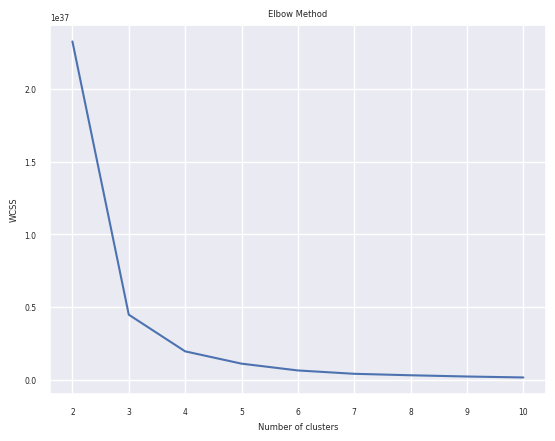

In [134]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
embeddings_listing_df.columns = embeddings_listing_df.columns.astype(str)
wcss = []
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=42)
    km = km.fit(embeddings_listing_df)
    wcss.append(km.inertia_)
plt.plot(range(2,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The optimal number of cluster is equal to 3.

In [135]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(embeddings_listing_df)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
embeddings_listing_df['Cluster_Label'] = cluster_labels


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: Futu

In [136]:
embeddings_listing_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0         1         2         3         4         5         6  \
0    -0.102720  0.158230  0.110433  0.132930  0.013355 -0.250285  0.148335   
1    -0.096357  0.142411  0.040805  0.123262  0.034517 -0.385688  0.250246   
2    -0.088916  0.108384  0.017828  0.074486  0.037223 -0.307798  0.214846   
3    -0.021978  0.256383 -0.041339  0.061835 -0.017391 -0.367925  0.219386   
6     0.015192  0.224220  0.038977  0.073482 -0.036760 -0.292302  0.129757   
...        ...       ...       ...       ...       ...       ...       ...   
4194 -0.006368  0.207411  0.109158  0.090135  0.015361 -0.406314  0.179691   
4196 -0.066063  0.267261  0.086422  0.194544  0.013115 -0.460223  0.163083   
4197 -0.066063  0.267261  0.086422  0.194544  0.013115 -0.460223  0.163083   
4198 -0.066063  0.267261  0.086422  0.194544  0.013115 -0.460223  0.163083   
4201  0.012184  0.256628  0.017618  0.099615 -0.015112 -0.330626  0.123449   

             7         8         9  ...       292       293       294  \
0     0.315330 -0.016931 -0.090339  ...  0.071389  0.017348  0.215014   
1     0.338428 -0.055861 -0.062212  ... -0.046249 -0.118742  0.193907   
2     0.280461 -0.058009 -0.036456  ... -0.025669 -0.092938  0.159228   
3     0.477511 -0.008412 -0.039871  ...  0.172735  0.024985  0.229343   
6     0.352343  0.025139 -0.024884  ...  0.148971 -0.010766  0.202891   
...        ...       ...       ...  ...       ...       ...       ...   
4194  0.476400 -0.018134 -0.126000  ...  0.124993  0.017908  0.245434   
4196  0.574340 -0.045635 -0.142162  ...  0.223976 -0.010239  0.332590   
4197  0.574340 -0.045635 -0.142162  ...  0.223976 -0.010239  0.332590   
4198  0.574340 -0.045635 -0.142162  ...  0.223976 -0.010239  0.332590   
4201  0.425280  0.013238 -0.064440  ...  0.140383  0.008398  0.203319   

           295       296       297       298       299                   id  \
0     0.203597  0.107569 -0.112181  0.086807 -0.046591                 3781   
1     0.187600  0.079021 -0.057955  0.083944 -0.027279                 5506   
2     0.156991  0.065464 -0.006316  0.066187 -0.051103                 6695   
3     0.176729  0.069381 -0.099059  0.176328 -0.135247                 8789   
6     0.192131  0.076159 -0.103821  0.155567 -0.091027                18711   
...        ...       ...       ...       ...       ...                  ...   
4194  0.267946  0.104884 -0.199971  0.131669 -0.092812  1045997580495005942   
4196  0.390534  0.160986 -0.231528  0.218801 -0.132655  1046356755567106626   
4197  0.390534  0.160986 -0.231528  0.218801 -0.132655  1046470991404568874   
4198  0.390534  0.160986 -0.231528  0.218801 -0.132655  1046490108856067836   
4201  0.181257  0.098247 -0.162155  0.172987 -0.070591  1047166785349446101   

      Cluster_Label  
0                 0  
1                 0  
2                 0  
3                 0  
6                 0  
...             ...  
4194              2  
4196              2  
4197              2  
4198              2  
4201              2  

[2036 rows x 302 columns]

In [137]:
df_with_clusters = df_listings.merge(embeddings_listing_df[['id', 'Cluster_Label']], on='id', how='left')
df_with_clusters.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



id       scrape_id                                               name  \
0   3781  20231218233145  Rental unit in Boston · ★4.96 · 1 bedroom · 1 ...   
1   5506  20231218233145  Guest suite in Boston · ★4.79 · 1 bedroom · 1 ...   
2   6695  20231218233145  Condo in Boston · ★4.81 · Studio · 2 beds · 1 ...   
3   8789  20231218233145  Rental unit in Boston · ★4.67 · 1 bedroom · 1 ...   
4  18711  20231218233145  Rental unit in Boston · ★4.31 · 3 bedrooms · 3...   

                               neighborhood_overview  host_id  host_since  \
0  Mostly quiet ( no loud music, no crowed sidewa...     4804  2008/12/03   
1  Peaceful, Architecturally interesting, histori...     8229  2009/02/19   
2  Peaceful, Architecturally interesting, histori...     8229  2009/02/19   
3  Beacon Hill is a historic neighborhood filled ...    26988  2009/07/22   
4  Once its own city, Dorchester is now Boston’s ...    71783  2010/01/19   

                                          host_about  host_response_time  \
0  My wife and I and grown children frequently oc...        within a day   
1              Relaxed,  Easy going, Accommodating.       within an hour   
2              Relaxed,  Easy going, Accommodating.       within an hour   
3  I manage a number of furnished units around Bo...        within a day   
4  Lance R. Swank, Principal\r\n\r\nHis units off...  a few days or more   

  host_response_rate host_acceptance_rate  ... review_scores_location  \
0                90%                  29%  ...                   4.88   
1               100%                 100%  ...                   4.55   
2               100%                 100%  ...                   4.51   
3                90%                  50%  ...                   4.96   
4                40%                  95%  ...                   4.24   

  review_scores_value     license instant_bookable  \
0                4.92     Unknown                f   
1                4.75  STR-490093                f   
2                4.71  STR-491702                f   
3                4.56     Unknown                f   
4                4.48     Unknown                f   

  calculated_host_listings_count reviews_per_month  bathrooms  \
0                              1              0.23        1.0   
1                             10              0.68        1.0   
2                             10              0.73        1.0   
3                              9              0.24        1.0   
4                             27              0.31        1.0   

   host_since_months highly_rated Cluster_Label  
0                183         True             0  
1                180        False             0  
2                180        False             0  
3                175        False             0  
4                169        False             0  

[5 rows x 47 columns]

In [138]:
cluster_description = df_with_clusters.groupby('Cluster_Label').agg({
    'price': ['mean', 'median', 'std'],
    'review_scores_rating': ['mean','median','std'],
    'number_of_reviews': ['mean','median','std'],
    'reviews_per_month': ['mean','median','std']
})
print(cluster_description)

                    price                    review_scores_rating         \
                     mean median         std                 mean median   
Cluster_Label                                                              
0              166.740933  135.0  124.442169             4.725233   4.82   
1              200.602740  180.0  136.003186             4.700822   4.82   
2              149.284600  113.0  123.484915             4.753002   4.82   

                        number_of_reviews                     \
                    std              mean median         std   
Cluster_Label                                                  
0              0.374804         92.912781   46.0  123.709645   
1              0.404771         16.613699    1.0   29.876142   
2              0.407751          6.029240    2.0   10.317855   

              reviews_per_month                   
                           mean median       std  
Cluster_Label                                     
0    

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [139]:
import plotly.express as px
fig = px.scatter_3d(df_with_clusters, x='price',y='review_scores_rating',z='number_of_reviews', color = 'Cluster_Label')
fig.update_traces(marker_size = 3)
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



## Sentiment Analysis

In [50]:
df_reviews.head()

listing_id        id        date  reviewer_id reviewer_name  \
0        3781  37776825  2015-07-10     36059247          Greg   
1        3781  41842494  2015-08-09     10459388           Tai   
2        3781  45282151  2015-09-01     12264652        Damien   
3        3781  49022647  2015-09-30     41426327          Mike   
4        3781  52503327  2015-10-30     15151513          Ivan   

                                            comments  \
0  the apartment was as advertised and frank was ...   
1  it was a pleasure to stay at franks place the ...   
2  the apartment description is entirely faithful...   
3  thoroughly enjoyed my time at franks home had ...   
4  great value for the money this location has ex...   

                                  tokenized_comments  
0  [apartment, advertised, frank, incredibly, hel...  
1  [pleasure, stay, frank, place, place, everythi...  
2  [apartment, description, entirely, faithful, b...  
3  [thoroughly, enjoyed, time, frank, home, ameni...  
4  [great, value, money, location, exceeding, exp...

###Embedding

In [51]:
import gensim.downloader as api
import numpy as np
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

model_word2vec = api.load('glove-wiki-gigaword-50')

In [52]:
import nltk
nltk.download('punkt')

def get_word_embedding(word, model):
    if word in model.key_to_index:
        return model[word]
    else:
        return np.zeros(model.vector_size)

embeddings = []
for review in df_reviews['tokenized_comments']:
  review_embeddings = [get_word_embedding(word, model_word2vec) for word in review ]
  review_embedding = np.mean(review_embeddings if len(review_embeddings) >0 else [np.zeros(model_word2vec.vector_size)], axis=0)
  embeddings = embeddings + [review_embedding]

embeddings = np.array(embeddings)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [53]:
embeddings.shape

(174487, 50)

### SentiWordNet

In [54]:
nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

In [55]:
from nltk.corpus import sentiwordnet as swn

def calculate_sentiwordnet_score(tokenized_review):
    sentiment_score = 0

    for word in tokenized_review:
        synsets = list(swn.senti_synsets(word))
        word_score=0
        if synsets:
            sentiment_score += synsets[0].pos_score() - synsets[0].neg_score()
        sentiment_score += word_score / len(synsets) if synsets else 0

    return sentiment_score

df_reviews['sentiment_score'] = df_reviews['tokenized_comments'].apply(calculate_sentiwordnet_score)

We first tried a sentiment tool named SentiWordNet. The sentiment scores in SentiWordNet are assigned to each synset of WordNet, which represent groups of synonymous words that share a common meaning. We expected SentiWordNet to provide three sentiment scores: positive, negative and objectivity for each synset, and calculate a mean score for each sentence.

In [56]:
df_reviews

listing_id                   id        date  reviewer_id  \
0                      3781             37776825  2015-07-10     36059247   
1                      3781             41842494  2015-08-09     10459388   
2                      3781             45282151  2015-09-01     12264652   
3                      3781             49022647  2015-09-30     41426327   
4                      3781             52503327  2015-10-30     15151513   
...                     ...                  ...         ...          ...   
182477  1039150219616773193  1045693858976693752  2023-12-13    381198215   
182478  1040527526059629043  1042105725677485453  2023-12-08      9723289   
182479  1040634799097914803  1047144075583848904  2023-12-15    494876133   
182480  1040634799097914803  1049339123694758332  2023-12-18     94199776   
182481  1046563598019556549  1047871350720023386  2023-12-16    336213171   

          reviewer_name                                           comments  \
0                  Greg  the apartment was as advertised and frank was ...   
1                   Tai  it was a pleasure to stay at franks place the ...   
2                Damien  the apartment description is entirely faithful...   
3                  Mike  thoroughly enjoyed my time at franks home had ...   
4                  Ivan  great value for the money this location has ex...   
...                 ...                                                ...   
182477        Gabrielle  a wonderful location to walk around the north ...   
182478  David & Whitley                    great deal and responsive hosts   
182479         Dannieli  our stay at diegos place was greatbrthe apartm...   
182480            Maxim  good place solid bedroomsbathrooms nice to par...   
182481            Jason          great host great home and amazing service   

                                       tokenized_comments  sentiment_score  
0       [apartment, advertised, frank, incredibly, hel...           -0.125  
1       [pleasure, stay, frank, place, place, everythi...            1.875  
2       [apartment, description, entirely, faithful, b...            1.500  
3       [thoroughly, enjoyed, time, frank, home, ameni...            5.125  
4       [great, value, money, location, exceeding, exp...            1.125  
...                                                   ...              ...  
182477  [wonderful, location, walk, around, north, end...            0.375  
182478                    [great, deal, responsive, host]            0.000  
182479  [stay, diegos, place, greatbrthe, apartment, d...            0.625  
182480  [good, place, solid, bedroomsbathrooms, nice, ...            0.500  
182481       [great, host, great, home, amazing, service]           -0.250  

[174487 rows x 8 columns]

We noticed that in the last row, "great host great home and amazing service" won a negative score, which made no sense. So we need to deep into the results of SentiWordNet.

<Axes: >

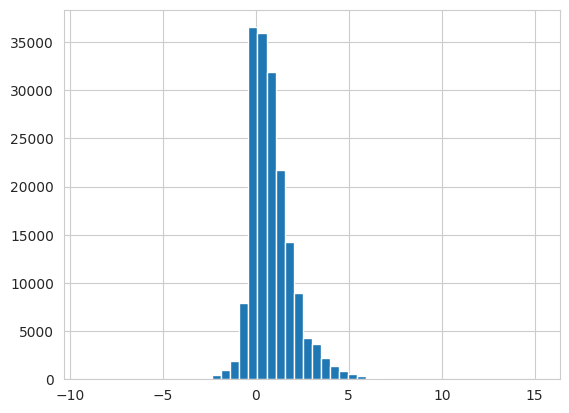

In [58]:
df_reviews['sentiment_score'].hist(bins=50)

In [61]:
df_reviews['sentiment_score'].mean()

0.8461783055471181

In [62]:
sentiment_labels = [1 if score > df_reviews['sentiment_score'].mean() else 0 for score in df_reviews['sentiment_score']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



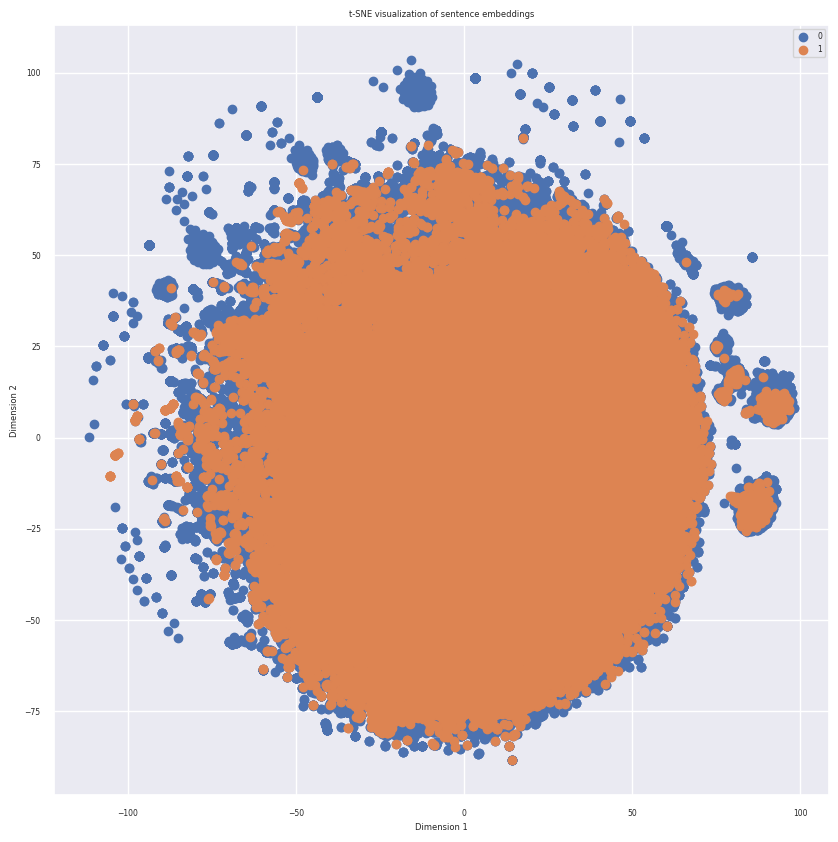

In [150]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
embeddings_2d = tsne.fit_transform(embeddings)

plt.figure(figsize=(10, 10))
for sentiment in np.unique(sentiment_labels):
    plt.scatter(embeddings_2d[sentiment_labels == sentiment, 0], embeddings_2d[sentiment_labels == sentiment, 1], label=sentiment)
plt.title('t-SNE visualization of sentence embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



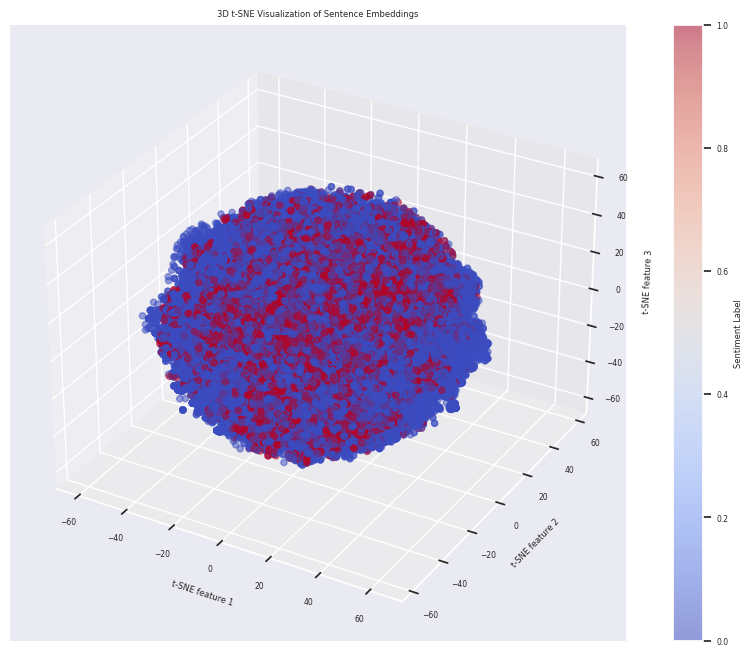

In [151]:
tsne_3d = TSNE(n_components=3, random_state=0)
embeddings_3d = tsne_3d.fit_transform(embeddings)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2],
                     c=sentiment_labels, cmap='coolwarm', s=20, alpha=0.5)

ax.set_title('3D t-SNE Visualization of Sentence Embeddings')
ax.set_xlabel('t-SNE feature 1')
ax.set_ylabel('t-SNE feature 2')
ax.set_zlabel('t-SNE feature 3')
plt.colorbar(scatter, label='Sentiment Label')
plt.show()


Neither 2D nor 3D plot shows a clear separation between different labels, they donnot correspond to sentiment in a straightforward way.

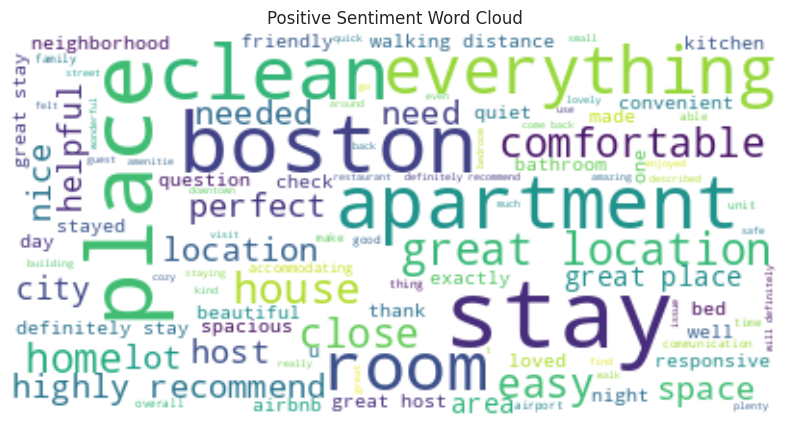

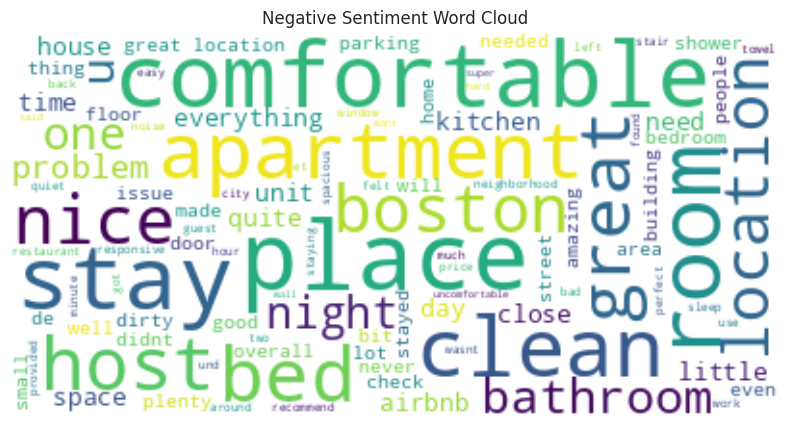

In [60]:
from wordcloud import WordCloud

positive_reviews = df_reviews[df_reviews['sentiment_score'] > 0]['comments']
negative_reviews = df_reviews[df_reviews['sentiment_score'] <= -1]['comments']

positive_text = " ".join(review for review in positive_reviews)
negative_text = " ".join(review for review in negative_reviews)

wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(positive_text)
wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.show()

WordCloud also shows that Negative Sentiment Word is not negative enough. we need to explore another way of sentiment analysis.

### VADER

Let's try another method named VADER.

In [57]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

df_reviews['sentiment_score_2'] = df_reviews['comments'].apply(lambda x: sia.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [58]:
df_reviews

listing_id                   id        date  reviewer_id  \
0                      3781             37776825  2015-07-10     36059247   
1                      3781             41842494  2015-08-09     10459388   
2                      3781             45282151  2015-09-01     12264652   
3                      3781             49022647  2015-09-30     41426327   
4                      3781             52503327  2015-10-30     15151513   
...                     ...                  ...         ...          ...   
182477  1039150219616773193  1045693858976693752  2023-12-13    381198215   
182478  1040527526059629043  1042105725677485453  2023-12-08      9723289   
182479  1040634799097914803  1047144075583848904  2023-12-15    494876133   
182480  1040634799097914803  1049339123694758332  2023-12-18     94199776   
182481  1046563598019556549  1047871350720023386  2023-12-16    336213171   

          reviewer_name                                           comments  \
0                  Greg  the apartment was as advertised and frank was ...   
1                   Tai  it was a pleasure to stay at franks place the ...   
2                Damien  the apartment description is entirely faithful...   
3                  Mike  thoroughly enjoyed my time at franks home had ...   
4                  Ivan  great value for the money this location has ex...   
...                 ...                                                ...   
182477        Gabrielle  a wonderful location to walk around the north ...   
182478  David & Whitley                    great deal and responsive hosts   
182479         Dannieli  our stay at diegos place was greatbrthe apartm...   
182480            Maxim  good place solid bedroomsbathrooms nice to par...   
182481            Jason          great host great home and amazing service   

                                       tokenized_comments  sentiment_score  \
0       [apartment, advertised, frank, incredibly, hel...           -0.125   
1       [pleasure, stay, frank, place, place, everythi...            1.875   
2       [apartment, description, entirely, faithful, b...            1.500   
3       [thoroughly, enjoyed, time, frank, home, ameni...            5.125   
4       [great, value, money, location, exceeding, exp...            1.125   
...                                                   ...              ...   
182477  [wonderful, location, walk, around, north, end...            0.375   
182478                    [great, deal, responsive, host]            0.000   
182479  [stay, diegos, place, greatbrthe, apartment, d...            0.625   
182480  [good, place, solid, bedroomsbathrooms, nice, ...            0.500   
182481       [great, host, great, home, amazing, service]           -0.250   

        sentiment_score_2  
0                  0.8070  
1                  0.5719  
2                  0.9557  
3                  0.9773  
4                  0.4380  
...                   ...  
182477             0.9042  
182478             0.7650  
182479             0.0356  
182480             0.7430  
182481             0.9186  

[174487 rows x 9 columns]

<Axes: >

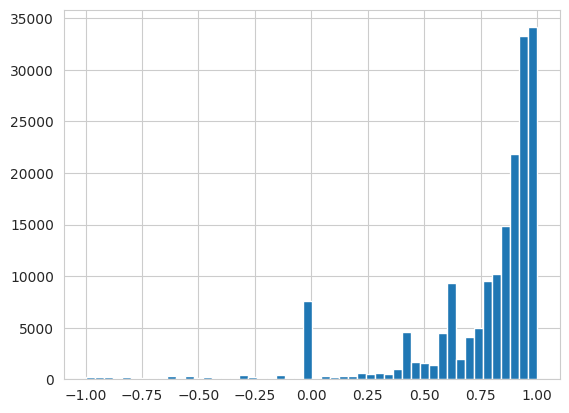

In [61]:
df_reviews['sentiment_score_2'].hist(bins=50)

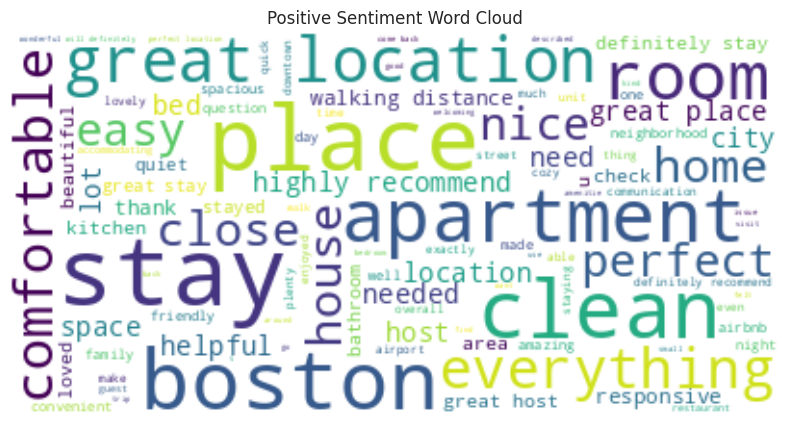

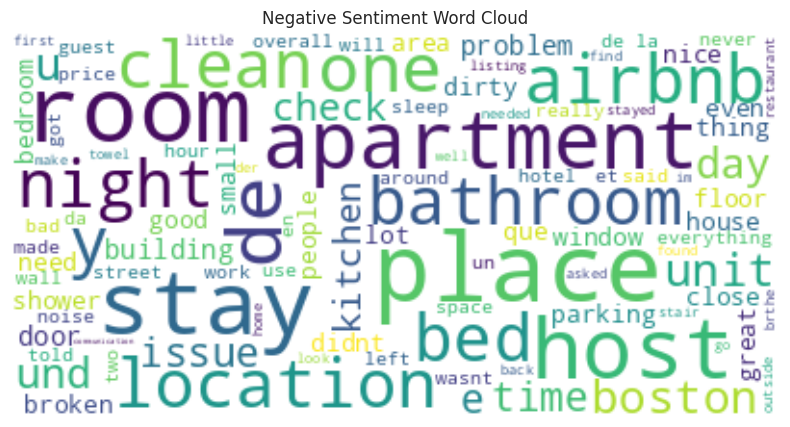

In [64]:
from wordcloud import WordCloud

positive_reviews = df_reviews[df_reviews['sentiment_score_2'] >= df_reviews['sentiment_score_2'].mean()]['comments']
negative_reviews = df_reviews[df_reviews['sentiment_score_2'] < 0]['comments']

positive_text = " ".join(review for review in positive_reviews)
negative_text = " ".join(review for review in negative_reviews)

wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(positive_text)
wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.show()

High-frequency words such as "place", "room", and "Boston" might be common in reviews but do not necessarily carry emotional information. It may be considered to remove these high-frequency but low-sentiment-load words to allow the word cloud to better highlight emotional information.

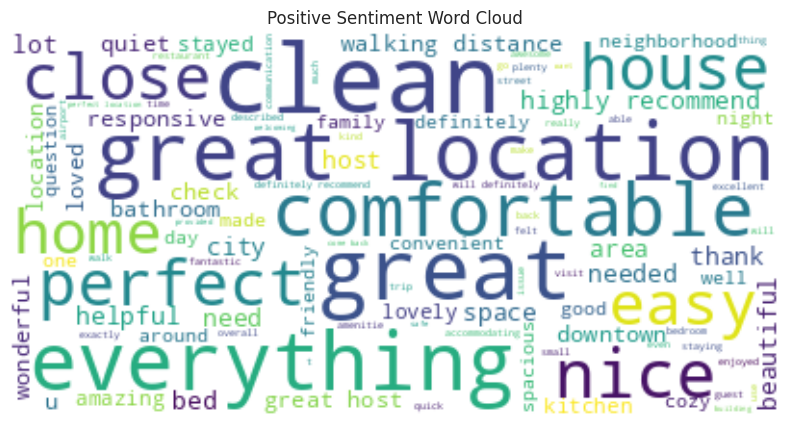

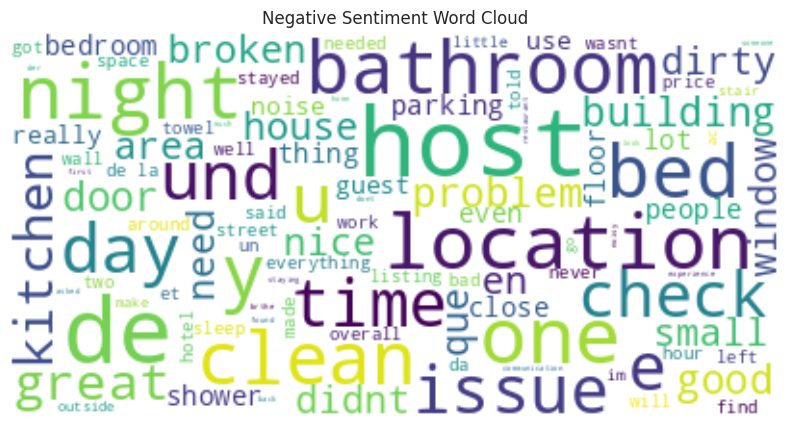

In [66]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

custom_stopwords = set(STOPWORDS).union({"place", "apartment", "boston","airbnb","unit","room","stay"})

wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="white",
                          stopwords=custom_stopwords).generate(positive_text)

wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="white",
                          stopwords=custom_stopwords).generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.show()


Positive Sentiment Word Cloud: The dominant words in the positive sentiment word cloud like "comfortable", "clean", "great location", "easy", "nice", and "everything" suggest that the positive reviews are focused on praising the general aspects of the accommodations, such as cleanliness, convenience, and overall satisfaction with the stay. These words indicate that guests have had pleasant experiences and are expressing their contentment with various attributes of the property.

Negative Sentiment Word Cloud: Interestingly, the negative sentiment word cloud contains words like "bathroom", "bedroom", and "kitchen", which are specific areas of a property. It also includes generally positive words like "clean" and "great", which could be part of phrases that express expectations or contrast, such as "not clean enough" or "great but noisy". This suggests that negative reviews often focus on particular aspects of the property that did not meet the guests' expectations. Rather than using overtly negative words such as "hate" or "bad", guests tend to provide more constructive feedback or highlight specific issues they encountered.



In [72]:
sentiment_labels2 = [1 if score >= df_reviews['sentiment_score_2'].mean() else 0 for score in df_reviews['sentiment_score_2']]

In [73]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
embeddings_2d = tsne.fit_transform(embeddings)

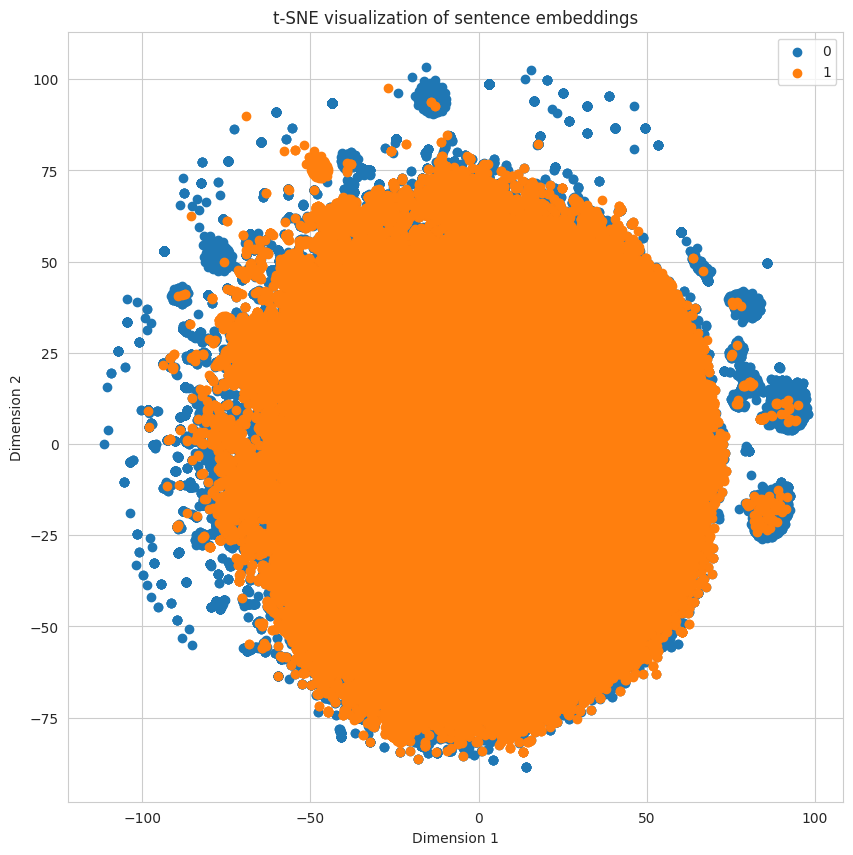

In [74]:
plt.figure(figsize=(10, 10))
for sentiment in np.unique(sentiment_labels2):
    plt.scatter(embeddings_2d[sentiment_labels2 == sentiment, 0], embeddings_2d[sentiment_labels2 == sentiment, 1], label=sentiment)
plt.title('t-SNE visualization of sentence embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

The t-SNE visualization based on the VADER sentiment classification still presents unclear boundaries, which might be due to the loss or distortion of information in the dimensions when reduced to two-dimensional space, making it challenging to distinguish between different sentiment categories. Additionally, sentiments are often not binary; they encompass a spectrum ranging from very negative to very positive. Therefore, the subtle nuances of sentiment might be difficult to fully represent in a two-dimensional space. Given that our dataset is extensive and that a single run takes approximately 30 minutes, we will not continue to investigate this further.

### Relationship between sentiment score of reviews and users' rating

Let's see if there is a relationship between a lisitng's sentiment score based on the reviews (SentiWordNet or VADER) and its review_scores_rating

In [60]:
df_reviews_avg = df_reviews.groupby('listing_id')['sentiment_score', 'sentiment_score_2'].mean().reset_index()

df_listings_selected = df_listings[['id', 'review_scores_rating', 'highly_rated']]

df_merged = pd.merge(df_reviews_avg, df_listings_selected, left_on='listing_id', right_on='id', how='inner')

<ipython-input-60-43d29143ca93>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_reviews_avg = df_reviews.groupby('listing_id')['sentiment_score', 'sentiment_score_2'].mean().reset_index()


In [61]:
df_merged

listing_id  sentiment_score  sentiment_score_2  \
0                    3781         1.494792           0.876121   
1                    5506         0.948770           0.825816   
2                    6695         1.187008           0.822883   
3                    8789         1.083333           0.804489   
4                   18711         1.009615           0.672629   
...                   ...              ...                ...   
1503  1026882119546282724         0.708333           0.898967   
1504  1027589412472932891         2.250000           0.964800   
1505  1027591977523175898         0.916667           0.850400   
1506  1036247914299882756         0.000000           0.153100   
1507  1039150219616773193         0.375000           0.904200   

                       id  review_scores_rating  highly_rated  
0                    3781                  4.96          True  
1                    5506                  4.79         False  
2                    6695                  4.81         False  
3                    8789                  4.67         False  
4                   18711                  4.31         False  
...                   ...                   ...           ...  
1503  1026882119546282724                  5.00          True  
1504  1027589412472932891                  5.00          True  
1505  1027591977523175898                  4.67         False  
1506  1036247914299882756                  5.00          True  
1507  1039150219616773193                  5.00          True  

[1508 rows x 6 columns]

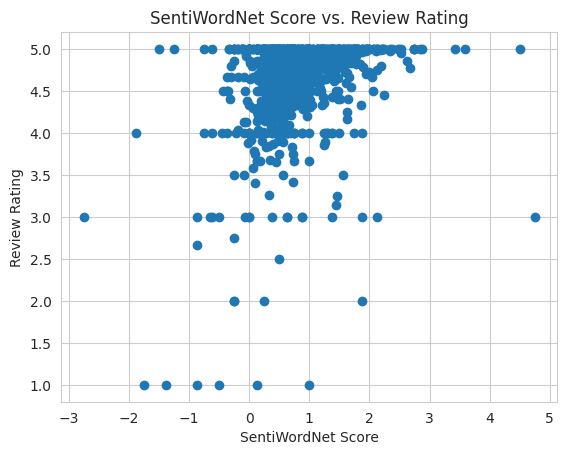

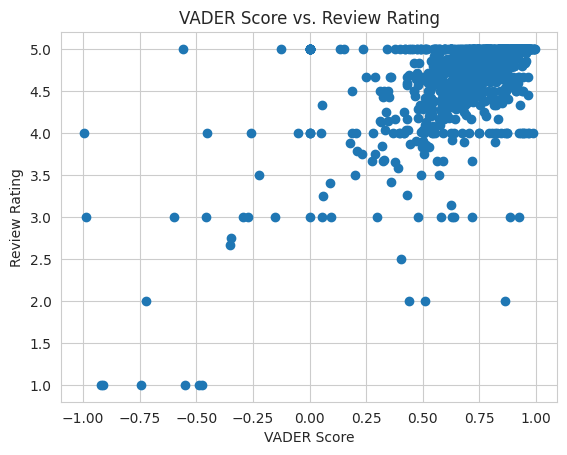

In [62]:
plt.scatter(df_merged['sentiment_score'], df_merged['review_scores_rating'])
plt.title('SentiWordNet Score vs. Review Rating')
plt.xlabel('SentiWordNet Score')
plt.ylabel('Review Rating')
plt.show()

plt.scatter(df_merged['sentiment_score_2'], df_merged['review_scores_rating'])
plt.title('VADER Score vs. Review Rating')
plt.xlabel('VADER Score')
plt.ylabel('Review Rating')
plt.show()

The scatter plot for SentiWordNet shows a relatively even distribution of points, while the scatter plot for VADER shows a dense clustering of points in the high rating area (close to a rating of 5.0), indicating a higher consistency between VADER scores and actual user ratings.






In [69]:
from scipy.stats import pearsonr

correlation_swn, pvalue_swn = pearsonr(df_merged['sentiment_score'], df_merged['review_scores_rating'])

print("Pearson Correlation Coefficient for SWN:", correlation_swn)
print("P-value for SWN:", pvalue_swn)

correlation_vader, pvalue_vader = pearsonr(df_merged['sentiment_score_2'], df_merged['review_scores_rating'])

print("Pearson Correlation Coefficient for VADER:", correlation_vader)
print("P-value for VADER:", pvalue_vader)


Pearson Correlation Coefficient for SWN: 0.30261128280662053
P-value for SWN: 2.6390183735094486e-33
Pearson Correlation Coefficient for VADER: 0.633212262424511
P-value for VADER: 8.638318983878084e-170


Based on the results displayed, the Pearson Correlation Coefficient for SentiWordNet is 0.3026, with a very low p-value of approximately 2.64e-33. This indicates a positive but relatively weak linear relationship between SentiWordNet scores and user ratings, and the relationship is statistically significant.

For VADER, the Pearson Correlation Coefficient is much higher at 0.6332, also with an extremely low p-value, around 8.64e-170, suggesting a stronger positive linear relationship with user ratings that is also statistically significant.

In [71]:
import statsmodels.api as sm

X = df_merged[['sentiment_score', 'sentiment_score_2']]
y = df_merged['review_scores_rating']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.402
Model:                              OLS   Adj. R-squared:                  0.401
Method:                   Least Squares   F-statistic:                     506.1
Date:                  Sun, 03 Mar 2024   Prob (F-statistic):          8.22e-169
Time:                          18:44:42   Log-Likelihood:                -537.68
No. Observations:                  1508   AIC:                             1081.
Df Residuals:                      1505   BIC:                             1097.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

From the LinearRegression result, we can see the VADER sentiment score (sentiment_score_2) is a strong predictor of user ratings, whereas the sentiment score from SentiWordNet (sentiment_score) does not show significant predictive power in this model. User ratings are positively correlated with the VADER sentiment score, meaning that higher sentiment scores are associated with higher user ratings. There may also be other variables affecting user ratings since the R-squared value is not equal to 1.

### Conclusion

Sentiment analysis is a complex and multi-dimensional task that requires capturing not only the emotional tendencies of the text but also accurately reflecting the intensity and subtleties of those sentiments. In our research, we have utilized two different sentiment analysis tools: SentiWordNet and VADER.

From the score results, VADER provides a more reasonable classification for negative and positive ratings compared to SentiWordNet. In word cloud analysis, SentiWordNet included many words in the negative category that actually convey positive sentiments, whereas the VADER results were much more coherent. The Pearson correlation coefficient shows that the sentiment scores provided by VADER have a stronger positive correlation with user ratings, along with an extremely low p-value, indicating that its correlation is statistically significant. SentiWordNet also demonstrates a positive correlation, but it is weaker. Similar findings were observed in linear regression analysis. This could be due to SentiWordNet's reliance on individual words without capturing the sentiment context effectively.

However, the t-SNE visualizations for both tools failed to show clear boundaries between sentiment categories, which could be due to the loss of information during dimensionality reduction or the complexity of sentiment classification that goes beyond a binary representation.

In summary, although no tool can perform sentiment analysis perfectly, VADER demonstrates better accuracy and relevance in our application scenario than SentiWordNet, making it a more reliable choice for assessing the emotional tendencies in user reviews. It also informs customers that user ratings can provide a brief indication of the overall quality of a property, but they should be combined with reviews for a comprehensive assessment.